In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import re
import seaborn as sns

In [10]:
# # #read survey data and set variable if CSV file
df = pd.read_csv('Office of Information  Technology 2024 AES.csv')

#preview data
df.head()

,Comment,Self-Identified Type
0,"This survey is advertised as being anonymous, ...",Improvement area
1,For supervisors to allow employees to attend t...,Improvement area
2,Suggest we use performance measurement baselin...,Improvement area
3,Richmond OIT is a complete disaster. Leadershi...,Improvement area
4,Improvement of collaboration between support t...,Improvement area


In [11]:
print(df.head())

                                             Comment Self-Identified Type
0  This survey is advertised as being anonymous, ...     Improvement area
1  For supervisors to allow employees to attend t...     Improvement area
2  Suggest we use performance measurement baselin...     Improvement area
3  Richmond OIT is a complete disaster. Leadershi...     Improvement area
4  Improvement of collaboration between support t...     Improvement area


In [19]:
#begin stem sorting house
from collections import defaultdict
import re

# stem lists for each category
accountability = ['respons', 'ownership', 'self-account', 'leadership', 'decision-mak', 'integr', 'transpar', 'self-disciplin', 'commit', 'answer', 'perform', 'expect', 'standard', 'evalu', 'feedback', 'consequ', 'improv', 'compli', 'monitor', 'supervis', 'teamwork', 'collabor', 'mutual account', 'peer review', 'support', 'trust', 'commun', 'shared goal', 'cooper']
career_advancement = ['advanc', 'promot', 'opportun', 'growth', 'career ladder', 'recognit', 'merit', 'progress', 'rais', 'promotion criteria', 'train', 'cours', 'certif', 'professional develop', 'cross-train', 'workshop', 'skill-build', 'learn', 'educ', 'development program', 'career path', 'development track', 'roadmap', 'progress plan', 'career goal', 'mentor', 'guid', 'career plan', 'succession plan', 'long-term goal']
communication = ['open', 'honest', 'clar', 'trust', 'disclos', 'candor', 'integr', 'straightforward', 'account', 'visibil', 'verbal', 'written', 'email', 'meet', 'team', 'chat', 'video call', 'present', 'report', 'announc', 'overcommun', 'undercommun', 'frequenc', 'volum', 'balanc', 'suffici', 'excess', 'inadequ', 'consist', 'information overload']
idea = ['divers', 'inclus', 'represent', 'equal opportun', 'diverse workforce', 'recruit', 'hiring practic', 'affirmative action', 'minor', 'underrepresent group', 'discrimin', 'bias', 'prejudic', 'harass', 'inequal', 'unfair treat', 'racism', 'sexism', 'exclus', 'microaggress']
employee_engagement = ['moral', 'engag', 'motiv', 'enthusi', 'job satisfact', 'commit', 'energi', 'positiv', 'disengag', 'burnout', 'leadership', 'support', 'guid', 'feedback', 'recognit', 'encourag', 'influenc', 'relationship', 'trust', 'manag', 'eecc', 'connection call', 'engagement call', 'employee check-in', 'commun', 'interact', 'feedback session', 'engagement meet', 'employee discuss', 'connection session', 'teamwork', 'collabor', 'cooper', 'camaraderi', 'trust', 'relationship-build', 'team bond', 'unit']
leadership = ['feedback', 'input', 'suggest', 'opinion', 'commun', 'ignor', 'overlook', 'unheard', 'dismiss', 'engag', 'ethic', 'integr', 'honest', 'fair', 'transpar', 'account', 'corrupt', 'misconduct', 'unethic', 'trustworthi', 'direct', 'guid', 'strategi', 'vision', 'priorit', 'goal', 'leadership', 'plan', 'discontent', 'misalign', 'servant leadership', 'empat', 'support', 'priorit', 'selfless', 'employee-focus', 'care', 'nurtur', 'empower', 'advocaci', 'trust', 'confid', 'reliabl', 'depend', 'credibil', 'faith', 'assur', 'loyalti', 'respect', 'belief']
meaningful_change = ['repeat', 'unchang', 'stagnant', 'ignor', 'overlook', 'unaddress', 'unresolv', 'inaction', 'frustrat', 'disregard', 'futil', 'pointless', 'hopeless', 'ineffect', 'dishearten', 'discourag', 'unheard', 'neglect', 'waste of time', 'skeptic', 'privaci', 'confidenti', 'anonym', 'secur', 'trust', 'protect', 'sensit inform', 'data breach', 'concern', 'safeguard']
ode = ['ode', 'aes', 'ees', 'survey', 'feedback', 'assess', 'evalu', 'metric', 'data collect', 'organizational develop', 'eecc', 'connection call', 'engagement call', '6 essential question', 'performance consultant', 'pc work', 'workshop', 'train session', 'development program', 'employee engag']
performance_management = ['performance review', 'apprais', 'evalu', 'feedback', 'goal', 'object', 'achiev', 'improv', 'assess', 'develop', 'fair', 'impartial', 'unbias', 'equit', 'just', 'honest', 'transpar', 'object', 'balanc', 'accur']
position_management = ['position descript', 'job role', 'respons', 'duti', 'task', 'accur', 'represent', 'job analys', 'role clar', 'job specific', 'align', 'skillset', 'competenc', 'qualif', 'expertis', 'match', 'fit', 'workforce plan', 'role suit', 'talent manag']
process_improvement = ['workflow', 'effici', 'optim', 'streamlin', 'automat', 'tool integr', 'process enhanc', 'improv', 'product', 'simplif']
recognition = ['bonus', 'incent', 'reward', 'performance bonus', 'achiev', 'recognit', 'extra pay', 'financial reward', 'merit pay', 'gratific', 'qsi', 'quality step increas', 'step increas', 'pay rais', 'salary adjust', 'performance-based increas', 'promot', 'increm', 'compens', 'pay scale', 'salary', 'pay', 'compens', 'wage', 'earn', 'competit pay', 'industry standard', 'remuner', 'incom', 'financial compens']
resources = ['tool', 'applic', 'softwar', 'equip', 'resourc', 'technolog', 'instrument', 'util', 'devic', 'solut', 'access', 'permiss', 'administr right', 'system access', 'user privileg', 'author', 'secur clear', 'credential', 'access control', 'account manag']
staffing = ['staffing level', 'workforc', 'augment', 'headcount', 'personnel', 'team size', 'recruit', 'hir', 'expans', 'capac', 'workload', 'overburden', 'stress', 'burnout', 'overwork', 'task load', 'operational issu', 'capac', 'product', 'effici', 'hir', 'recruit', 'unethic', 'unfair', 'slow process', 'bias', 'discrimin', 'delay', 'ineffici', 'transpar', 'engag', 'motiv', 'commit', 'enthusi', 'job satisfact', 'involv', 'particip', 'dedic', 'moral', 'product']
succession_planning = ['success', 'successor', 'knowledge transfer', 'mentor', 'train', 'develop', 'continu', 'leadership pipelin', 'skill develop', 'prepar', 'coach', 'transit', 'future leader', 'talent manag', 'knowledge shar']
strategy = ['reorganiz', 'realign', 'structural chang', 'organizational chang', 'restructur', 'transit', 'adapt', 'uncertain', 'stabil', 'adjust', 'cloud strategi', 'cloud adopt', 'cloud migrat', 'cloud servic', 'cloud comput', 'scalabil', 'flexibil', 'innovat', 'cloud infrastructur', 'cloud solut', 'polici', 'compli', 'regul', 'guidelin', 'standard', 'procedur', 'adher', 'govern', 'protocol', 'rule']
technology = ['vista', 'vmware', 'system', 'softwar', 'applic', 'platform', 'technolog', 'it system', 'infrastructur', 'solut', 'connection issu', 'network problem', 'connect', 'downtim', 'latenc', 'access issu', 'system outag', 'technical difficulti', 'network failur', 'disrupt', 'cerner', 'ehr', 'electronic health record', 'health it', 'medical record', 'patient data', 'health inform', 'digital record', 'health system', 'clinical document', 'microsoft team', 'collabor tool', 'commun platform', 'video conferenc', 'chat', 'virtual meet', 'technical support', 'usability', 'integr', 'function']
telework = ['telework', 'remote work', 'work from home', 'flexibil', 'telecommut', 'virtual work', 'remote opportun', 'home offic', 'flexible schedul', 'remote option']
positive_comments = ['appreci', 'satisfact', 'enjoy', 'positive experienc', 'gratitud', 'motiv', 'encourag', 'fulfil', 'pride', 'happi', 'support', 'team spirit',]

Check for stem presence and prepare as a count/total.

In [20]:
# Initialize a dictionary to store the counts for each category
category_counts = defaultdict(int)

# function to check if any stem is present in the comment
def check_stems(comment, stems):
    for stem in stems:
        if re.search(stem, comment, re.IGNORECASE):
            return True
    return False

# Iterate through each comment and check for category stems
for comment in df['Comment']:
    if check_stems(comment, accountability):
        category_counts['Accountability'] += 1
    if check_stems(comment, career_advancement):
        category_counts['Career Advancement'] += 1
    if check_stems(comment, communication):
        category_counts['Communication'] += 1
    if check_stems(comment, idea):
        category_counts['Inclusion, Diversity, Equity, and Accessibility (IDEA)'] += 1
    if check_stems(comment, employee_engagement):
        category_counts['Employee Engagement'] += 1
    if check_stems(comment, leadership):
        category_counts['Leadership'] += 1
    if check_stems(comment, meaningful_change):
        category_counts['Meaningful Change from Surveys'] += 1
    if check_stems(comment, ode):
        category_counts['Organization Development and Engagement (ODE)'] += 1
    if check_stems(comment, performance_management):
        category_counts['Performance Management'] += 1
    if check_stems(comment, position_management):
        category_counts['Position Management'] += 1
    if check_stems(comment, process_improvement):
        category_counts['Process Improvement'] += 1
    if check_stems(comment, recognition):
        category_counts['Recognition'] += 1
    if check_stems(comment, resources):
        category_counts['Resources'] += 1
    if check_stems(comment, staffing):
        category_counts['Staffing'] += 1
    if check_stems(comment, succession_planning):
        category_counts['Succession Planning'] += 1
    if check_stems(comment, strategy):
        category_counts['Strategy'] += 1
    if check_stems(comment, technology):
        category_counts['Technology'] += 1
    if check_stems(comment, telework):
        category_counts['Telework'] += 1
    if check_stems(comment, positive_comments):
        category_counts['Positive Comments'] += 1

# Print the counts for each category
for category, count in category_counts.items():
    print(f"{category}: {count}")


Accountability: 697
Career Advancement: 287
Inclusion, Diversity, Equity, and Accessibility (IDEA): 59
Meaningful Change from Surveys: 118
Organization Development and Engagement (ODE): 296
Position Management: 171
Recognition: 177
Employee Engagement: 628
Leadership: 633
Succession Planning: 180
Staffing: 365
Technology: 160
Communication: 379
Performance Management: 380
Process Improvement: 203
Resources: 140
Positive Comments: 213
Strategy: 197
Telework: 98


In [23]:
sorted_category_counts = dict(sorted(category_counts.items(), key=lambda item: item[1]))

In [24]:
# Print the sorted dictionary
for category, count in sorted_category_counts.items():
    print(f"{category}: {count}")

Inclusion, Diversity, Equity, and Accessibility (IDEA): 59
Telework: 98
Meaningful Change from Surveys: 118
Resources: 140
Technology: 160
Position Management: 171
Recognition: 177
Succession Planning: 180
Strategy: 197
Process Improvement: 203
Positive Comments: 213
Career Advancement: 287
Organization Development and Engagement (ODE): 296
Staffing: 365
Communication: 379
Performance Management: 380
Employee Engagement: 628
Leadership: 633
Accountability: 697


In [21]:
# Define a function to check if a stem is present in the comment (T/F versions)
def check_stems(comment, stems):
    for stem in stems:
        if re.search(stem, comment, re.IGNORECASE):
            return True
    return False

# Add a column for each category and insert "1" or "0"
df['Accountability'] = df['Comment'].apply(lambda x: 1 if check_stems(x, accountability) else 0)
df['Career Advancement'] = df['Comment'].apply(lambda x: 1 if check_stems(x, career_advancement) else 0)
df['Communication'] = df['Comment'].apply(lambda x: 1 if check_stems(x, communication) else 0)
df['Inclusion, Diversity, Equity, and Accessibility (IDEA)'] = df['Comment'].apply(lambda x: 1 if check_stems(x, idea) else 0)
df['Employee Engagement'] = df['Comment'].apply(lambda x: 1 if check_stems(x, employee_engagement) else 0)
df['Leadership'] = df['Comment'].apply(lambda x: 1 if check_stems(x, leadership) else 0)
df['Meaningful Change from Surveys'] = df['Comment'].apply(lambda x: 1 if check_stems(x, meaningful_change) else 0)
df['Organization Development and Engagement (ODE)'] = df['Comment'].apply(lambda x: 1 if check_stems(x, ode) else 0)
df['Performance Management'] = df['Comment'].apply(lambda x: 1 if check_stems(x, performance_management) else 0)
df['Position Management'] = df['Comment'].apply(lambda x: 1 if check_stems(x, position_management) else 0)
df['Process Improvement'] = df['Comment'].apply(lambda x: 1 if check_stems(x, process_improvement) else 0)
df['Recognition'] = df['Comment'].apply(lambda x: 1 if check_stems(x, recognition) else 0)
df['Resources'] = df['Comment'].apply(lambda x: 1 if check_stems(x, resources) else 0)
df['Staffing'] = df['Comment'].apply(lambda x: 1 if check_stems(x, staffing) else 0)
df['Succession Planning'] = df['Comment'].apply(lambda x: 1 if check_stems(x, succession_planning) else 0)
df['Strategy'] = df['Comment'].apply(lambda x: 1 if check_stems(x, strategy) else 0)
df['Technology'] = df['Comment'].apply(lambda x: 1 if check_stems(x, technology) else 0)
df['Telework'] = df['Comment'].apply(lambda x: 1 if check_stems(x, telework) else 0)
df['Positive Comments'] = df['Comment'].apply(lambda x: 1 if check_stems(x, positive_comments) else 0)

# Save the updated DataFrame to a new CSV file
df.to_csv('Updated_Office_of_Information_Technology_2024_AES.csv', index=False)


In [22]:
#Write new files based on comment analysis:

# Load the updated CSV file into a DataFrame
df = pd.read_csv('Updated_Office_of_Information_Technology_2024_AES.csv')

# List of categories
categories = [
    'Accountability', 'Career Advancement', 'Communication',
    'Inclusion, Diversity, Equity, and Accessibility (IDEA)',
    'Employee Engagement', 'Leadership', 'Meaningful Change from Surveys',
    'Organization Development and Engagement (ODE)', 'Performance Management',
    'Position Management', 'Process Improvement', 'Recognition',
    'Resources', 'Staffing', 'Succession Planning', 'Strategy',
    'Technology', 'Telework', 'Positive Comments'
]

# Iterate through each category and write comments with a "1" to separate files
for category in categories:
    filtered_df = df[df[category] == 1]
    filtered_df[['Comment']].to_csv(f'{category}_Comments.csv', index=False)

print("Comments have been written to separate files for each category.")


Comments have been written to separate files for each category.


### *EDITING NEEDED HERE*

In [ ]:
# #provide file path to monthly survey file
# #you may have to change this file path to match your pathway.
# excel_file_path = "C:/Users/OITPUGClarkK/Desktop/Comment Analysis/Monthly/Monthly CX - September - Data Export.xlsx"

# #provide sheet name if multiple, e.g. below
# # sheet_name = "Data"

# #read data
# df = pd.read_excel(excel_file_path) #add (or remove) following for sheet: , sheet_name=sheet_name)
# df.head()

In [ ]:
# #create new dataframe with just the NPS and comment columns
# df = df.iloc[:, [3, 4, 5, 28, 43, 83, 87, 88, 94, 99, 102]]

# #preview
# df.head()

In [ ]:
for idx, column_name in enumerate(df.columns):
    print(f"Column {idx}: {column_name}")

Column 0: Based on your most recent experience, please rate your satisfaction with the IT Helpdesk (Enterprise Service Desk).
Column 1: Please rate your satisfaction with the quality of interactions you have had most recently with the IT Professionals at your location.
Column 2: Please rate your overall satisfaction with the functionalities of yourIT Service Portal, which is the application on your desktop for requesting IT services.
Column 3: How likely is it that you would recommend the products and services of the Office of Information and Technology (OIT) to a friend or colleague?
Column 4: Location
Column 5: What changes would have to be made by OIT for you to give it an even higher rating?
Column 6: Please share your compliment for the IT professionals at your location below. (Optional)
Column 7: Please share your improvement idea for the IT professionals at your location below. (Optional)
Column 8: Unnamed: 46
Column 9: What does OIT do really well?
Column 10: What changes would

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Comment               1047 non-null   object
 1   Self-Identified Type  1047 non-null   object
dtypes: object(2)
memory usage: 16.5+ KB


### *EDITING MAY BE NEEDED HERE*

In [ ]:
#remove row 0
df = df.iloc[1:]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 1 to 1577
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ESD Rating          1207 non-null   object
 1   EUO Rating          1216 non-null   object
 2   yourIT Rating       1218 non-null   object
 3   NPS                 1454 non-null   object
 4   Location            1577 non-null   object
 5   Passive Comments    192 non-null    object
 6   EUO Compliment      155 non-null    object
 7   EUO Improvement     32 non-null     object
 8   yourIT Comments     107 non-null    object
 9   Promoter Comments   805 non-null    object
 10  Detractor Comments  199 non-null    object
 11  ESD Compliment      104 non-null    object
 12  ESD Improvement     15 non-null     object
dtypes: object(13)
memory usage: 160.3+ KB


In [ ]:
df.NPS.value_counts()

NPS
10    686
9     228
8     182
7     110
5      85
6      53
0      28
2      22
3      22
4      21
1      17
Name: count, dtype: int64

In [ ]:
def map_values(value):
    if isinstance(value, str):
        if '1 - Poor' in value:
            return '1'
        elif '10 - Excellent' in value:
            return '10'
    return value

In [ ]:
def convert_to_float(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
convert_to_float(df, 'ESD Rating')
convert_to_float(df, 'EUO Rating')
convert_to_float(df, 'yourIT Rating')
convert_to_float(df, 'NPS')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 1 to 1577
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESD Rating          1207 non-null   float64
 1   EUO Rating          1216 non-null   float64
 2   yourIT Rating       1218 non-null   float64
 3   NPS                 1454 non-null   float64
 4   Location            1577 non-null   object 
 5   Passive Comments    192 non-null    object 
 6   EUO Compliment      155 non-null    object 
 7   EUO Improvement     32 non-null     object 
 8   yourIT Comments     107 non-null    object 
 9   Promoter Comments   805 non-null    object 
 10  Detractor Comments  199 non-null    object 
 11  ESD Compliment      104 non-null    object 
 12  ESD Improvement     15 non-null     object 
dtypes: float64(4), object(9)
memory usage: 160.3+ KB


In [ ]:
#create new dataframes for different comment columns.
passive_df = df.iloc[:, [3, 4, 5]]
euo_detractor_df = df.iloc[:, [1, 3, 4, 7]]
euo_promoter_df = df.iloc[:, [1, 3, 4, 6]]
yourit_df = df.iloc[:, [2, 3, 4, 8]]
promoter_df = df.iloc[:, [3, 4, 9]]
detractor_df = df.iloc[:, [3, 4, 10]]
esd_detractor_df = df.iloc[:, [0, 3, 4, 12]]
esd_promoter_df = df.iloc[:, [0, 3, 4, 11]]

promoter_df.head()

,NPS,Location,Promoter Comments
1,NaN,,NaN
2,9.0,"MO - St. Louis VA Medical Center, Jefferson Ba...",They make sure that you have properly working ...
3,1.0,MD - Baltimore VA Medical Center (512),NaN
4,7.0,MI - Battle Creek VA Medical Center (515),NaN
5,10.0,"FL - Tampa, James A. Haley Veterans' Hospital ...",answers questions


In [ ]:
df_list = [passive_df, euo_detractor_df, euo_promoter_df, yourit_df, promoter_df, detractor_df, esd_detractor_df, esd_promoter_df]

In [ ]:
yourit_df.head()

,yourIT Rating,NPS,Location,yourIT Comments
1,NaN,NaN,,NaN
2,8.0,9.0,"MO - St. Louis VA Medical Center, Jefferson Ba...",NaN
3,3.0,1.0,MD - Baltimore VA Medical Center (512),NaN
4,7.0,7.0,MI - Battle Creek VA Medical Center (515),NaN
5,9.0,10.0,"FL - Tampa, James A. Haley Veterans' Hospital ...",NaN


It looks like there are some comments that are out of place.  Promoters should have NPS of 9 or 10, passives 7 or 8, and detractors everything below 7.
Let's remove these outliers, which could have been from someone going back and editing their survey responses, or due to a minor and inconsequential skip-logic error.  

In [ ]:
promoter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 2 to 1573
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NPS                805 non-null    float64
 1   Location           805 non-null    object 
 2   Promoter Comments  805 non-null    object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


We will just remove these comments. Let's also create some additional dataframes that will help us sort the comments of the EUO, ESD, and yourIT dataframes.

In [ ]:
promoter_df = promoter_df[promoter_df['NPS'] > 8]
passive_df = passive_df[(passive_df['NPS'] > 6) & (passive_df['NPS'] < 9)]
detractor_df = detractor_df[detractor_df['NPS'] < 7]
euo_promoter_df = euo_promoter_df[euo_promoter_df['EUO Rating'] >= 8]
euo_detractor_df = euo_detractor_df[euo_detractor_df['EUO Rating'] < 8]
yourit_promoter_df = yourit_df[yourit_df['yourIT Rating'] >= 8]
yourit_detractor_df = yourit_df[yourit_df['yourIT Rating'] < 8]

In [ ]:
#refresh list of dfs for subsequent function
df_list = [passive_df, euo_promoter_df, euo_detractor_df, yourit_df, yourit_promoter_df, yourit_detractor_df,
           promoter_df, detractor_df, esd_promoter_df, esd_detractor_df]

### **Processing and Visualizing Functions**

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

#### Process Dataframes Function (tokenizing, stemming, and removing stopwords)

The main thing we need to do first is to process each of the dataframes by tokenizing each of the words in each comment, stemming them to reduce them down to their base form as much as possible for count consolidation, and remove unhelpful stopwords like "at" and "and".  We will make a function that can apply to all of these dataframes at once.

In [ ]:
#Create function for tokenizing, stemming, and removing stopwords from comments
def process_dataframe(dataframe):
    # Convert the 'comments' column to strings and handle NaN values
    dataframe[dataframe.columns[-1]] = dataframe[dataframe.columns[-1]].astype(str).str.lower()
    # dataframe[dataframe.columns[-1]].replace('nan', np.nan, inplace=True)
    # dataframe[dataframe.columns[-1]].fillna('', inplace=True)

    # Token pattern
    basic_token_pattern = r"(?u)\b\w\w+\b"

    # Tokenizer variable
    tokenizer = RegexpTokenizer(basic_token_pattern)

    # Tokenize the comments and create a new column 'comments_tokenized'
    dataframe['comments_tokenized'] = dataframe[dataframe.columns[-1]].apply(lambda x: tokenizer.tokenize(str(x)))

    # Download stopwords
    nltk.download('stopwords', quiet=True)
    stopwords_list = stopwords.words('english')
    stopwords_list.remove('too')

    # Function to remove stopwords from a list of tokens
    def remove_stopwords(token_list):
        return [token for token in token_list if token not in stopwords_list]

    # Remove stopwords from 'comments_tokenized' column
    dataframe['comments_tokenized'] = dataframe['comments_tokenized'].apply(remove_stopwords)

    # Initialize the Porter stemmer
    stemmer = PorterStemmer()

    # Function to apply the stemmer to each word in a list
    def stem_words(words):
        stemmed_words = [stemmer.stem(word) for word in words]
        return stemmed_words

    # Apply the stem_words function to each list of words in the 'comments_tokenized' column
    dataframe['comments_stemmed'] = dataframe['comments_tokenized'].apply(lambda x: stem_words(x))

    return dataframe

Great, the function is made, and now we need to loop through each dataframe and apply the function. We will also preview each dataframe to verify that a comments_tokenized and a comments_stemmed column was created for each one.

In [ ]:
# Loop through each DataFrame number and apply the function
for df in df_list:
    process_dataframe(df)

In [ ]:
# Print the first few rows of each processed DataFrame
for df in df_list:
    second_column_name = df.columns[-3]
    print(f'Processed DataFrame {second_column_name}:')
    print(df.head(5))
    print("\n" + "=" * 50 + "\n") #separate each df with an extra line

Looks great!  Now just on a quick glance, there may be additional words we want to add to the stopword list as we analyze further. Let's create a function to add more stopwords if we need to.

#### Add Stopwords Function (tokens)

If we need to add additional stop words, the function below will add them

In [ ]:
#Need to uncomment out the last lines to run function and add new words

#create stopword list for function
stopwords_list = stopwords.words('english')

def add_custom_stopwords(new_words):
    """
    Given a list of new words, add them to the stopwords_list.
    """
    global stopwords_list  # Assuming stopwords_list is a global variable

    # Confirm the length of the original stopword list
    print("Original stopword list length:", len(stopwords_list))

    # Add new words to the stopwords_list
    stopwords_list.extend(new_words)

    # Confirm the new length
    print("List length after adding custom words:", len(stopwords_list))

# Sample new words to add
#new_words = ['aptive', 'work']  # Add your custom words here

# Call the function to add the custom words
#add_custom_stopwords(new_words)

Now we can add new stopwords!  As one way to help us figure out which stopwords to add, let's visualize the top 30 stemmed words and see if there are any that are less helpful than others.

The function below takes in the comments_stemmed column of a dataframe, computes the frequency distribution of the stemmed words in the column, and then graphs the top 30 using Aptive colors.

Most of these look great and are in line with the top themes of previous analyses.  It looks like the stemmed words 'issu', 'get', and 'manner' though would not be particularly helpful, as they are all too generic.  Let's create a function to remove stopwords, combining it with our previous function for adding stopwords to the stopwords_list.

In [ ]:
#If stopwords need to be removed, the below function combined witht the add_custom_stopwords function will do so

#function to remove stopwrods from a list of tokens
def remove_stopwords(token_list):
    return [token for token in token_list if token not in stopwords_list]

# Sample new words to add
new_words = ['issu', 'get', 'manner']  # Add your custom words here

# Call the previous add_custom_stopwords function to add the new_words above
add_custom_stopwords(new_words)

#Apply remove_stopwords function to 'comments_stemmed'
promoter_df['comments_stemmed'] = promoter_df['comments_stemmed'].apply(remove_stopwords)


Original stopword list length: 179
List length after adding custom words: 182


Great, we can see that the three words were added to the stopword list.  If we want to remove these stopwords from all of the dfs at once after updating the stopwords_list by means of the add_custom_stopwords function, we can use the following function to do so.  We won't do that just yet, so the line to call the function has been commented out for now.

In [ ]:
#Function to remove stopwords with updated stopword list from all dfs at once
def remove_stopwords_dfs(list, remove_stopwords_func):
    # Loop through each DataFrame number and apply the desired operation
    for df in list:
        # Apply the remove_stopwords function to the 'comments_stemmed' column
        df['comments_stemmed'] = df['comments_stemmed'].apply(remove_stopwords_func)

#remove_stopwords_dfs(df_list, remove_stopwords)

Now let's verify that those three stopword were in fact removed by calling our visualization function again.

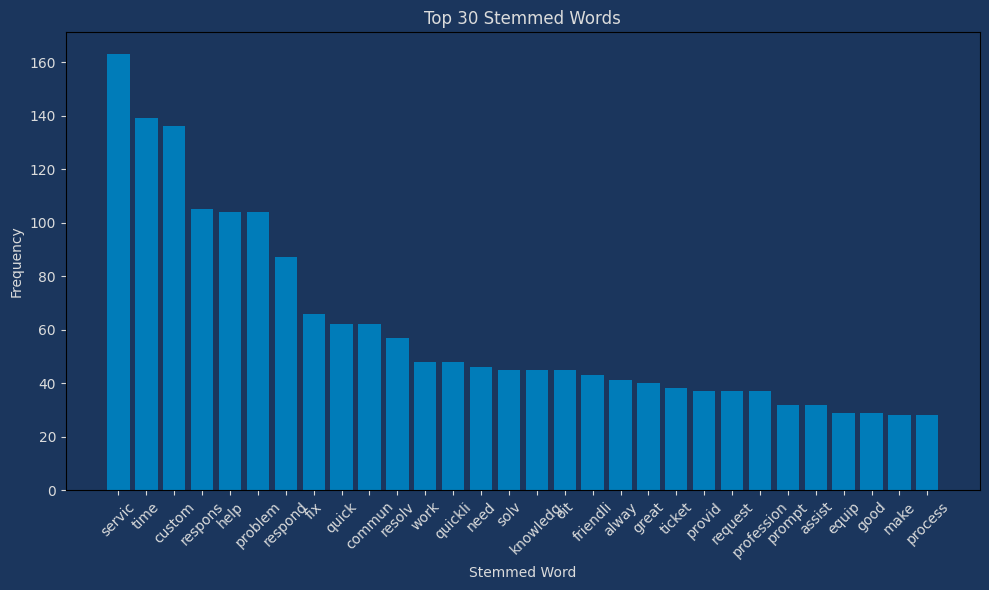

In [ ]:
# Call the plot function to check for the removed stopwords
plot_top_30(promoter_df)

Perfect, those three stopwords have been removed and we can see a few others that are more relevant have moved up the line.

Another approach we can take for analysis and stopword removal is to generate a simple list of these frequencies.  Let's create a function to do just that.

#### Function for List of Stem Frequency

In [ ]:
#function for providing most frequent stemmed words as list
def stem_freq(dataframe):
    # Tokenize words in the 'comments_stemmed' column and create a list of all tokens
    all_tokens = [token for sublist in dataframe['comments_stemmed'] for token in sublist]

    # Calculate frequency distribution for all tokens
    freq_dist = FreqDist(all_tokens)

    #create list of tuples containing frequency and token
    token_freq_list = [(token, freq_dist[token]) for token in freq_dist]

    #Sort the list based on frequency in descending order
    sorted_token_freq_list = sorted(token_freq_list, key=lambda x: x[1], reverse=True)

    #return sorted list
    return sorted_token_freq_list

In [ ]:
stem_freq(promoter_df)

[('servic', 163),
 ('time', 139),
 ('custom', 136),
 ('respons', 105),
 ('help', 104),
 ('problem', 104),
 ('respond', 87),
 ('fix', 66),
 ('quick', 62),
 ('commun', 62),
 ('resolv', 57),
 ('work', 48),
 ('quickli', 48),
 ('need', 46),
 ('solv', 45),
 ('knowledg', 45),
 ('oit', 45),
 ('friendli', 43),
 ('alway', 41),
 ('great', 40),
 ('ticket', 38),
 ('provid', 37),
 ('request', 37),
 ('profession', 37),
 ('prompt', 32),
 ('assist', 32),
 ('equip', 29),
 ('good', 29),
 ('make', 28),
 ('process', 28),
 ('comput', 27),
 ('well', 27),
 ('answer', 25),
 ('patient', 24),
 ('everyth', 24),
 ('softwar', 24),
 ('job', 23),
 ('fast', 22),
 ('sure', 21),
 ('question', 21),
 ('staff', 21),
 ('address', 21),
 ('effici', 20),
 ('thing', 20),
 ('follow', 19),
 ('understand', 18),
 ('team', 18),
 ('excel', 18),
 ('explain', 17),
 ('done', 17),
 ('support', 17),
 ('promptli', 16),
 ('realli', 16),
 ('person', 16),
 ('care', 15),
 ('concern', 15),
 ('troubleshoot', 15),
 ('inform', 13),
 ('courteou', 1

As we can see, we have the same data as the visualization above with the same top stemmed words, but now we have a list and we can view all of the stemmed words in the promoter_df at once, should we so choose.  This is where we will identify the themes comprehensively.  This will likely require manual review for the most accuracy, but once these themes and their corresponding stemmed words are identified, it should take minimal effort for upkeep.  As we will see below, respondents discussing timeliness, for example, are likely to use certain words consistently to convey that idea of timeliness.  In short, the work to categorize these themes and group their stemmed words will be frontloaded- this workload will diminish over time because of the limitations of the English language and the verbal consistency with which respondents will discuss any given topic.

To aid with this process, it may be helpful to export the stem list as an excel document for easier searching. The below code provides this output.

In [ ]:
def stem_list(df, title=None):
    #convert function output to list
    stem_list = stem_freq(df)

    #convert list to DataFrame
    stem_list_df = pd.DataFrame({'Stem Count': stem_list})

    #assign title
    df_name = title.lower()

    #specify excel file path
    excel_file_path = f'{df_name}.xlsx'

    #export DataFrame to Excel
    stem_list_df.to_excel(excel_file_path, index=False)

    print(f"List exported to {excel_file_path}")

stem_list(promoter_df, 'promoter_stem_list')

List exported to promoter_stem_list.xlsx


We want to be able to see the actual comments for any given stemmed word to verify that we are categorizing the stemmed word correctly, to analyze the comments themselves, and to provide quotes for monthly briefings as summative examples.  Let's create a function to do that.

In [ ]:
# Function to get matching rows from list of stemmed words
def get_matching_stem(dataframe, stemmed_words):
    def check_match(comment):
        for word in stemmed_words:
            if isinstance(word, str): #check if single stem
                if word in comment:
                    return True
            elif isinstance(word, tuple): #check if pair of words
                if all(w in comment for w in word):
                    return True
        return False

    filtered_df = dataframe[dataframe['comments_stemmed'].apply(check_match)]

     # Set display option to show full content of columns
    pd.set_option('display.max_colwidth', None)

    result_df = filtered_df.iloc[:, -4:-2]

    return result_df

#Old, single stem function below:
#
# def get_matching_stem(dataframe, stemmed_words):
#     # Filter the DataFrame based on the stemmed words
#     filtered_df = dataframe[dataframe['comments_stemmed'].apply(lambda x: any(word in x for word in stemmed_words))]

#     #Reset index to avoid issues with iloc
#     filtered_df = filtered_df.reset_index(drop=True)

#     # Set display option to show full content of columns
#     pd.set_option('display.max_colwidth', None)

#     # Output the location and comment columns of the matching rows
#     result_df = filtered_df.iloc[:, -4:-2]

#     return result_df

In [ ]:
# Function to get matching rows from list of stemmed words number of words in comments
def get_matching_stem_length(dataframe, stemmed_words, min_length):
    def check_match(comment):
        for word in stemmed_words:
            if isinstance(word, str): #check if single stem
                if word in comment:
                    return True
            elif isinstance(word, tuple): #check if pair of words
                if all(w in comment for w in word):
                    return True
        return False

    filtered_df = dataframe[dataframe['comments_stemmed'].apply(lambda x: check_match(x) and len(x) >= min_length)]

     # Set display option to show full content of columns
    pd.set_option('display.max_colwidth', None)

    result_df = filtered_df.iloc[:, -4:-2]

    return result_df


# #former single-stem function below:
# # Function to get matching rows from list of stemmed words
# def get_matching_stem_length(dataframe, stemmed_words, min_length):
#     # Filter the DataFrame based on the stemmed words
#     filtered_df = dataframe[dataframe['comments_stemmed'].apply(lambda x: any(word in x for word in stemmed_words) and len(x) >= min_length)]

#     #Reset index to avoid issues with iloc
#     filtered_df = filtered_df.reset_index(drop=True)

#     # Set display option to show full content of columns
#     pd.set_option('display.max_colwidth', None)

#     # Output the comment column of the matching rows
#     result_df = filtered_df.iloc[:, -4:-2]

#     return result_df

In [ ]:
def get_matching_all(dataframe, stemmed_words):
    # Filter the DataFrame based on the stemmed words
    filtered_df = dataframe[dataframe['comments_stemmed'].apply(lambda x: all(word in x for word in stemmed_words))]

    #Reset index to avoid issues with iloc
    filtered_df = filtered_df.reset_index(drop=True)

    # Set display option to show full content of columns
    pd.set_option('display.max_colwidth', None)

    # Output the location and comment columns of the matching rows
    result_df = filtered_df.iloc[:, -4:-2]

    return result_df

In [ ]:
#Create function to get matching rows
def get_matching_stem_exclude(dataframe, stemmed_words, exclusion_stems):
    #set exclusion_stems to list of exclusion_stems in called function
    exclusion_stems = exclusion_stems

    # Filter the DataFrame based on the stemmed words
    filtered_df = dataframe[dataframe['comments_stemmed'].apply(lambda x: any(word in x for word in stemmed_words))]

    #Exclude rows based on exclusion_stems
    filtered_df = filtered_df[~filtered_df['comments_stemmed'].apply(lambda x: any(word in x for word in exclusion_stems))]

    #Reset index to avoid issues with iloc
    filtered_df = filtered_df.reset_index(drop=True)

    # Set display option to show full content of columns
    pd.set_option('display.max_colwidth', None)

    # Output the first two columns of the matching rows
    result_df = filtered_df.iloc[:, 1:3]

    return result_df

In [ ]:
def get_excel(output_function, *args, excel_filename=None, **kwargs):
    #Call provided function with given argument
    output_data = output_function(*args, **kwargs)

    #Determine the Excel filename
    if excel_filename is None:
        excel_filename = 'output.xlsx'

    #check if the filename has the .xlsx extension
    if not excel_filename.lower().endswith('.xlsx'):
        excel_filename += '.xlsx'

    #write the dataframe to Excel fil
    output_data.to_excel(excel_filename, index=False, engine='xlsxwriter')
    print(f"Excel file '{excel_filename}' created successfully.")

In [ ]:
def get_excel_length(output_function, *args, excel_filename=None, min_length, **kwargs):
    #Call provided function with given argument
    output_data = output_function(*args, min_length, **kwargs)

    #Determine the Excel filename
    if excel_filename is None:
        excel_filename = 'output.xlsx'

    #check if the filename has the .xlsx extension
    if not excel_filename.lower().endswith('.xlsx'):
        excel_filename += '.xlsx'

    #write the dataframe to Excel fil
    output_data.to_excel(excel_filename, index=False, engine='xlsxwriter')
    print(f"Excel file '{excel_filename}' created successfully.")

In [ ]:
#Extend display to see all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### **Category Comment Analysis**

*   Stemmed word lists for each of the 19 categories
*   The variable names are

```
accountability
career_advancement
communication
idea
employee_engagement
leadership
meaningful_change
ode
performance_management
position_management
process_improvement
recognition
resources
staffing
succession_planning
strategy
technology
telework
positive_comments
```





Accountability

In [ ]:
accountability = ['respons', 'ownership', 'self-account', 'leadership', 'decision-mak', 'integr', 'transpar', 'self-disciplin', 'commit', 'answer', 'perform', 'expect', 'standard', 'evalu', 'feedback', 'consequ', 'improv', 'compli', 'monitor', 'supervis', 'teamwork', 'collabor', 'mutual account', 'peer review', 'support', 'trust', 'commun', 'shared goal', 'cooper']


Career Advancement

In [ ]:
career_advancement = ['advanc', 'promot', 'opportun', 'growth', 'career ladder', 'recognit', 'merit', 'progress', 'rais', 'promotion criteria', 'train', 'cours', 'certif', 'professional develop', 'cross-train', 'workshop', 'skill-build', 'learn', 'educ', 'development program', 'career path', 'development track', 'roadmap', 'progress plan', 'career goal', 'mentor', 'guid', 'career plan', 'succession plan', 'long-term goal']


Communication

In [ ]:
communication = ['open', 'honest', 'clar', 'trust', 'disclos', 'candor', 'integr', 'straightforward', 'account', 'visibil', 'verbal', 'written', 'email', 'meet', 'team', 'chat', 'video call', 'present', 'report', 'announc', 'overcommun', 'undercommun', 'frequenc', 'volum', 'balanc', 'suffici', 'excess', 'inadequ', 'consist', 'information overload']


Inclusion, Diversity, Equity, and Accessibility (IDEA)

In [ ]:
idea = ['divers', 'inclus', 'represent', 'equal opportun', 'diverse workforce', 'recruit', 'hiring practic', 'affirmative action', 'minor', 'underrepresent group', 'discrimin', 'bias', 'prejudic', 'harass', 'inequal', 'unfair treat', 'racism', 'sexism', 'exclus', 'microaggress']


Employee Engagement

In [ ]:
employee_engagement = ['moral', 'engag', 'motiv', 'enthusi', 'job satisfact', 'commit', 'energi', 'positiv', 'disengag', 'burnout', 'leadership', 'support', 'guid', 'feedback', 'recognit', 'encourag', 'influenc', 'relationship', 'trust', 'manag', 'eecc', 'connection call', 'engagement call', 'employee check-in', 'commun', 'interact', 'feedback session', 'engagement meet', 'employee discuss', 'connection session', 'teamwork', 'collabor', 'cooper', 'camaraderi', 'trust', 'relationship-build', 'team bond', 'unit']


Leadership

In [ ]:
leadership = ['feedback', 'input', 'suggest', 'opinion', 'commun', 'ignor', 'overlook', 'unheard', 'dismiss', 'engag', 'ethic', 'integr', 'honest', 'fair', 'transpar', 'account', 'corrupt', 'misconduct', 'unethic', 'trustworthi', 'direct', 'guid', 'strategi', 'vision', 'priorit', 'goal', 'leadership', 'plan', 'discontent', 'misalign', 'servant leadership', 'empat', 'support', 'priorit', 'selfless', 'employee-focus', 'care', 'nurtur', 'empower', 'advocaci', 'trust', 'confid', 'reliabl', 'depend', 'credibil', 'faith', 'assur', 'loyalti', 'respect', 'belief']


Meaningful Change

In [ ]:
meaningful_change = ['repeat', 'unchang', 'stagnant', 'ignor', 'overlook', 'unaddress', 'unresolv', 'inaction', 'frustrat', 'disregard', 'futil', 'pointless', 'hopeless', 'ineffect', 'dishearten', 'discourag', 'unheard', 'neglect', 'waste of time', 'skeptic', 'privaci', 'confidenti', 'anonym', 'secur', 'trust', 'protect', 'sensit inform', 'data breach', 'concern', 'safeguard']


ODE

In [ ]:
ode = ['ode', 'aes', 'ees', 'survey', 'feedback', 'assess', 'evalu', 'metric', 'data collect', 'organizational develop', 'eecc', 'connection call', 'engagement call', '6 essential question', 'performance consultant', 'pc work', 'workshop', 'train session', 'development program', 'employee engag']


Performance Management

In [ ]:
performance_management = ['performance review', 'apprais', 'evalu', 'feedback', 'goal', 'object', 'achiev', 'improv', 'assess', 'develop', 'fair', 'impartial', 'unbias', 'equit', 'just', 'honest', 'transpar', 'object', 'balanc', 'accur']


Position Management

In [ ]:
position_management = ['position descript', 'job role', 'respons', 'duti', 'task', 'accur', 'represent', 'job analys', 'role clar', 'job specific', 'align', 'skillset', 'competenc', 'qualif', 'expertis', 'match', 'fit', 'workforce plan', 'role suit', 'talent manag']


Process Improvement

In [ ]:
process_improvement = ['workflow', 'effici', 'optim', 'streamlin', 'automat', 'tool integr', 'process enhanc', 'improv', 'product', 'simplif']


Recognition

In [ ]:
recognition = ['bonus', 'incent', 'reward', 'performance bonus', 'achiev', 'recognit', 'extra pay', 'financial reward', 'merit pay', 'gratific', 'qsi', 'quality step increas', 'step increas', 'pay rais', 'salary adjust', 'performance-based increas', 'promot', 'increm', 'compens', 'pay scale', 'salary', 'pay', 'compens', 'wage', 'earn', 'competit pay', 'industry standard', 'remuner', 'incom', 'financial compens']


Resources


In [ ]:
resources = ['tool', 'applic', 'softwar', 'equip', 'resourc', 'technolog', 'instrument', 'util', 'devic', 'solut', 'access', 'permiss', 'administr right', 'system access', 'user privileg', 'author', 'secur clear', 'credential', 'access control', 'account manag']


Staffing

In [ ]:
staffing = ['staffing level', 'workforc', 'augment', 'headcount', 'personnel', 'team size', 'recruit', 'hir', 'expans', 'capac', 'workload', 'overburden', 'stress', 'burnout', 'overwork', 'task load', 'operational issu', 'capac', 'product', 'effici', 'hir', 'recruit', 'unethic', 'unfair', 'slow process', 'bias', 'discrimin', 'delay', 'ineffici', 'transpar', 'engag', 'motiv', 'commit', 'enthusi', 'job satisfact', 'involv', 'particip', 'dedic', 'moral', 'product']


Strategy


In [ ]:
strategy = ['reorganiz', 'realign', 'structural chang', 'organizational chang', 'restructur', 'transit', 'adapt', 'uncertain', 'stabil', 'adjust', 'cloud strategi', 'cloud adopt', 'cloud migrat', 'cloud servic', 'cloud comput', 'scalabil', 'flexibil', 'innovat', 'cloud infrastructur', 'cloud solut', 'polici', 'compli', 'regul', 'guidelin', 'standard', 'procedur', 'adher', 'govern', 'protocol', 'rule']


Succession Planning

In [ ]:
succession_planning = ['success', 'successor', 'knowledge transfer', 'mentor', 'train', 'develop', 'continu', 'leadership pipelin', 'skill develop', 'prepar', 'coach', 'transit', 'future leader', 'talent manag', 'knowledge shar']


Technology

In [ ]:
technology = ['vista', 'vmware', 'system', 'softwar', 'applic', 'platform', 'technolog', 'it system', 'infrastructur', 'solut', 'connection issu', 'network problem', 'connect', 'downtim', 'latenc', 'access issu', 'system outag', 'technical difficulti', 'network failur', 'disrupt', 'cerner', 'ehr', 'electronic health record', 'health it', 'medical record', 'patient data', 'health inform', 'digital record', 'health system', 'clinical document', 'microsoft team', 'collabor tool', 'commun platform', 'video conferenc', 'chat', 'virtual meet', 'technical support',

Telework

In [ ]:
telework = ['telework', 'remote work', 'work from home', 'flexibil', 'telecommut', 'virtual work', 'remote opportun', 'wfh', 'home offic', 'flexible schedul', 'remote option']


Positive Comments

In [ ]:
positive_comments = ['appreci', 'satisfact', 'enjoy', 'positive experienc', 'gratitud', 'motiv', 'encourag', 'fulfil', 'pride', 'happi', 'support', 'team spirit', 'collabor', 'innovat', 'achiev', 'recognit', 'growth', 'develop', 'success', 'positive feedback']


Matching Stem Collections:

In [ ]:

get_matching_stem(promoter_df, accountability)

In [ ]:
get_matching_stem(promoter_df, career_advancement)

In [ ]:
get_matching_stem(promoter_df, communication)

In [ ]:
get_matching_stem(promoter_df, idea)

In [ ]:
get_matching_stem(promoter_df, employee_engagement)

In [ ]:
get_matching_stem(promoter_df, idea)

In [ ]:
get_matching_stem(promoter_df, employee_engagement)

In [ ]:
get_matching_stem(promoter_df, leadership)

In [ ]:
get_matching_stem(promoter_df, meaningful_change)

In [ ]:
get_matching_stem(promoter_df, ode)

In [ ]:
get_matching_stem(promoter_df, performance_management)

In [ ]:
get_matching_stem(promoter_df, position_management)

In [ ]:
get_matching_stem(promoter_df, position_management)

In [ ]:
get_matching_stem(promoter_df, process_improvement)

In [ ]:
get_matching_stem(promoter_df, recognition)

In [ ]:
get_matching_stem(promoter_df, resources)

In [ ]:
get_matching_stem(promoter_df, staffing)

In [ ]:
get_matching_stem(promoter_df, succession_planning)

Te#### Customer Service Theme

In [ ]:
#Create list for Customer Service stems
#('stem1', 'stem2') for pairs, otherwise just 'stem'
#To add to this list, follow the same format for stems or pairs of stems.  In order to know what stem format a word will take, look at the stem list
#exports and search using the first few letters of the word you are looking for.

#cust_serv = [('servic', 'custom'), ('servic', 'great'), ('servic', 'poor'), ('servic', 'bad'), ('servic', 'badli'), ('servic', 'excellent'),
#             ('servic', 'receiv'), ('servic', 'reciev'), ('servic', 'good'), ('servic', 'terribl'), ('servic', 'outstand'), ('servic', 'horribl'),
#             ('servic', 'better'), ('servic', 'improv'), ('servic', 'declin'), ('servic', 'provid'),
#             'support', 'nice', 'kind', 'kindli', 'friendli', 'respect', 'helpful', 'understand', 'empathi', 'empathet', ('good', 'listen'), 'helpful',
#             'care', 'profession', 'professionali', 'attent', 'attentit',
#             'rude', 'rudest', 'disrespect', 'arrog', 'irrit', 'burden', 'burdensom', 'yell', 'shout', 'condescend', 'condecend', 'condescens',
#             'swear', 'curs', ('under', 'breath')]

#Previous list in this script below, in case it is helpful
# cust_serv = [('servic', 'custom'), 'custom', 'support', 'nice', 'kind', 'kindli', 'friendli', 'respect', 'helpful', 'understand', 'empathi', 'empathet',
#              'care', 'profession', 'professionali', 'attent', 'attentit', 'happi', 'felt',
#              'rude', 'rudest', 'disrespect', 'arrog', 'irrit', 'burden', 'burdensom', 'condescend', 'condecend', 'condescens', 'stupid',
#              'yell', 'frustrat', 'attitud', 'behavior', 'moral', 'inappropri']

#General Customer Service tags used by CFI:
#The following are all captured in the Python with the stem 'servic'. For the promoter and detractor dfs, 'servic' is enough, but for the other
#dataframes like the passives where we may need to parse out the proporation of positive and negative comments related to customer service, the secondary
#stems attached to 'servic' below may be a helfpul place to start.
#"\"customer service\" OR \"great service\" OR \"poor service\" OR \"bad service\" OR \"excellent service\" OR \"service I received\"
#OR \"service I receive\" OR \"good service\" OR \"terrible service\" OR \"outstanding service\" OR \"horrible service\" OR
#\"better service\" OR \"improve service\" OR \"declined service\" OR \"declining service\" OR \"improved service\" OR \"improving service\"
#OR \"service they provide\" OR \"service they provided\"

#General Customer Service tags used by CFI without the term 'service':
#OR support or rude or nice or kind or disrespect or arrogant or irritated or burden
#or nice or friendly or respect or helpful or understanding or empathetic or \"good listener\" or yell or shout or condescending or swear or
#curse or (under breath)~2 or helpful or caring or \"care about\" or \"cares about\" or professional or professionalism or attentive"


#Pull rows for the cust_serv stem list above, aka "Customer Service" comments
#get_matching_stem(promoter_df, cust_serv)

A quick glance at these show that this method has provided accurate results.  The vast majority of these comments discuss elements of customer service with very few exceptions.

If we need to check other stems, below is the get_matching_stem function

In [ ]:
#call function to pull rows for given stem
get_matching_stem_length(promoter_df, cust_serv, 10)

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, promoter_df, cust_serv, excel_filename='Promoter Customer Service Comments')

Excel file 'Promoter Customer Service Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, promoter_df, cust_serv, min_length=10, excel_filename='Promoter Customer Service Comments 10 Or More Words')

Excel file 'Promoter Customer Service Comments 10 Or More Words.xlsx' created successfully.


A quick glance at these show that this method has provided accurate results.  The vast majority of these comments discuss elements of customer service with very few exceptions.

If we need to check other stems, below is the get_matching_stem function

In [ ]:
#call function to pull rows for given stem
get_matching_stem(promoter_df, ['feel'])

,Location,Promoter Comments
101,TN - Nashville VA Medical Center (626),speak clearly and respectfully. never make me feel like i should be ashamed of getting locked out of the system or forgetting passwords.
544,MT - Fort Harrison VA Medical Center (436),i feel response time is great and many things can be done over the phone instantly. it increases my credibility when i recommend it and it works!
750,NJ - East Orange VA Medical Center (561),"good equipment, quick troubleshooting, never makes me feel dumb"
998,"CA - Los Angeles, Greater Los Angeles Healthcare System (691)","they fix things immediately on the phone if they can. if they can't, i feel like it's not that long a wait before i hear from someone local who gets on my computer and helps me."
1029,IL - Marion VA Medical Center (657A5),"i know almost nothing about computers except how to work the programs when everything is functioning normally. when things go wrong or i am just not doing something correctly, they never make me feel stupid. they have been super in person, teams, or via the phone. i have worked lots of places in my 900 years of nursing and this group at the va are off the charts!!"
1123,"OK - Muskogee, Jack C. Montgomery VA Medical Center (623)","they are friendly, helpful and prompt -- and they don't make you feel stupid while doing it."
1281,ND - Fargo VA Medical Center (437),i feel like they are responsive and address issues quickly which minimizes downtime etc.


Let's check how many respondents there are here.

In [ ]:
#call length of promoter respondents mentioning customer service
len(get_matching_stem(promoter_df, cust_serv))

247

And let's check the total number of promoter respondents.

In [ ]:
len(promoter_df)

805

Now let's calculate the percentage of promoter respondents that mention customer service.

# **Customer Service Promoter Percentage HERE**

In [ ]:
#call length of promoter respondents mentioning customer service and divide by total promoter respondents
(len(get_matching_stem(promoter_df, cust_serv)) / len(promoter_df)) * 100

30.683229813664596

Excellent.  So above is the percentage of promoter respondents who mention Customer service.  This statistic, combined with an example quote from above can be used in the creation of our briefing decks.

Let's make a function for this percentage output, as we will be utilizing this data for the other dataframes too.  

In [ ]:
#Create function for percentage of total respondents who included list of stems
def percentage(df, list):
    print((len(get_matching_stem(df, list)) / len(df)) * 100)

percentage(promoter_df, cust_serv)

#### Timeliness Theme

In [ ]:
#create list of Timeliness stems
#('stem1', 'stem2') for pairs, otherwise just 'stem'
#To add to this list, follow the same format for stems or pairs of stems.  In order to know what stem format a word will take, look at the stem list
#exports and search using the first few letters of the word you are looking for.

#time = [('too', 'long'), ('long', 'resolv'), ('too', 'slow'), ('slow', 'fix'), ('long', 'fix'), ('slow', 'resolv'), 'timeli', ('took', 'forev'),
#       ('wait', 'long'), ('long', 'time'), ('wait', 'time'), ('slow', 'address'), ('hold', 'time'), 'quick', 'quickli', 'quicker', 'immedi',
#        'fast', 'faster', 'shorter', 'shorten', ('take', 'long'), ('taken', 'long'), 'prioriti', 'urgent', 'urgenci', 'haste']


#Timeliness tags used in this script previously:
# time = ['time', 'quick', 'quickli', 'quicker', 'prompt', 'fast', 'faster', 'promptli', 'timeli', 'immedi', 'soon', 'asap', 'expedit',
#         'expediti', 'expedi', 'delay', 'turnaround', 'speed', 'speedi', 'urgent', 'rapid', 'rapidli', 'swift', 'swiftli', 'timefram',
#         'readili', 'effici',
#         'wait', 'slow', 'wast', 'shorter', 'shorten']

#Timeliness tags used by CFI:
#The following are generally negative with few stems related to positive timeliness.  MAny of these will be more useful for the detractor_df.
# "\"too long\" OR \"to long\" OR \"too long to resolve\" OR \"to long to resolve\" OR \"too slow to fix\"
# OR \"to slow to fix\" OR \"too long to fix\" OR \"to long to fix\" OR \"too slow to resolve\" OR \"to slow to resolve\"
# OR \"took too long\" OR \"took to long\" OR \"was not timely\" OR \"is not timely\" OR \"took forever\" OR \"wait a long time\"
# OR \"slow to address\" OR \"wait time\" OR \"hold time\" OR \"not quick\" OR \"should be immediate\" OR \"should be fast\" OR
# \"should be faster\" OR \"shorten\" OR \"shortened\" OR \"should not take so long\" OR \"should not take as long\" OR \"should not be so slow\"
# OR timeliness OR timely OR \"long time\" or wait time or priority or urgency or haste"

#call function to pull rows for Timeliness and Speed
#get_matching_stem(promoter_df, time)

Excellent. Now, we can see how the stemming separated out 'time' from 'timeli', though they really share the same stem.  There are ways to consolidate these stems, but for now we can simply add them to our Timeliness list above, which will become more accurate with the more relevant stemmed words we add.  It will be necessary to systematically scan the stem_freq(promoter_df) output to verify if any other terms may be relevant for these theme of 'timeliness' and other similar themes where multiple stemmed words may be relevant.    

To help with this, we scan stem_freq(promoter_df) output, and then we can use the cell below to preview the rows of specific stemmed words to see if that word is relevant for adding in this theme.  Here is the stem_freq(promoter_df) output again for convenience.

In [ ]:
#call function to pull rows for given stem
get_matching_stem(promoter_df, ['prioriti'])

,Location,Promoter Comments
1253,"OK - Muskogee, Jack C. Montgomery VA Medical Center (623)","staff is very knowledgeable and they have great customer service. when there is a job stop, they make the ticket a priority and it shows in the timeliness of the response."


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, promoter_df, time, excel_filename='Promoter Timeliness Comments')

Excel file 'Promoter Timeliness Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, promoter_df, time, min_length=10, excel_filename='Promoter Timeliness Comments 10 Or More Words')

Excel file 'Promoter Timeliness Comments 10 Or More Words.xlsx' created successfully.


# **Timeliness Promoter Percentage HERE**

##### **Timeliness Promoter Percentage**

In [ ]:
#call length of of promoter respondents mentioning Timeliness divided by total respondents
percentage(promoter_df, time)

17.763975155279503


#### Communication and Responsiveness Theme

In [ ]:
#create list of Communication and Responsiveness stems
#('stem1', 'stem2') for pairs, otherwise just 'stem'
#To add to this list, follow the same format for stems or pairs of stems.  In order to know what stem format a word will take, look at the stem list
#exports and search using the first few letters of the word you are looking for.

comm_resp = ['commun', 'followup', 'follow', 'respons', 'respond', 'responc', 'respon', 'process', 'instruct', 'step', 'repli', 'listen', 'convey',
             ('IT', 'lingo'), ('IT', 'jargon'), ('IT', 'languag'), ('IT', 'term'), ('IT', 'terminolog'), ('IT', 'speech'),
             ('tech', 'lingo'), ('tech', 'jargon'), ('tech', 'languag'), ('tech', 'term'), ('tech', 'terminolog'), ('tech', 'speech'),
             ('technician', 'lingo'), ('technician', 'jargon'), ('technician', 'languag'), ('technician', 'term'), ('technician', 'terminolog'),
             ('technician', 'speech'), 'attent', 'hear', 'heard', 'prompt', 'promptli']

# comm_resp = ['commun', 'follow', 'followup', 'instruct', 'step', 'repli,' 'listen', 'convers', 'conver', 'convey', 'languag', 'term',
#              'terminolog', 'speak', 'contact', 'email', 'answer', 'explain', 'explan', 'clear', 'clearli', 'process', 'told', 'tell', 'talk',
#              'address', 'explain', 'ignor', 'interact', 'remark',
#              'respons', 'respond', 'responc', 'respon', 'correspond']

#Communication tags used by CFI:
# Communication or communicate or \"follow up\" or \"follow-up\" or follow or response or respond or process or instructions or
# steps or \"back to you\" or \"respond back\" or \"reply back\" or (follow up response)~5 or \"listen to\" or
# \"listened to\" or understand or convey or ((IT| tech) and (lingo| jargon| language| terms| speech)) or attentive",

#Responsiveness tags used by CFI, two lists, undetermined which one or both used:

#"respond or response or responsive or \"pick up\" or (answer and (phone or call or request or ticket))"

# "\"not responsive\" OR \"very responsive\" OR \"not at all responsive\" OR \"did not hear\" OR \"didn't hear\" OR
# \"delayed response\" OR \"slow response\" OR \"no response\" OR \"slow to respond\" OR response OR \"quick to respond\"
# OR \"good response\" OR \"bad response\" OR \"faster response\" OR \"response time\" OR responsiveness OR responsive OR
# \"rapid response\" OR \"fast to respond\" OR \"timeliness of response\" OR \"ineffective response\" or
# ((fast| quick| speed| short| slow| long| time) and response) or respond or reply or response or
# ((fast| quick| speed| short| slow| long| time) and reply) or ((fast| quick| speed| short| slow| long| time) and respond) or prompt",

#"Understand" is already listed under Customer Service cust_serv list above, so I have not included it here.
#Many of the tags under Responsiveness are more about Timeliness.  Potentially something to consider in the future.


#call function to pull rows for Communication/Responsiveness
get_matching_stem(promoter_df, comm_resp)

In [ ]:
#call function to pull rows for given stem
get_matching_stem(promoter_df, ['explain'])

,Location,Promoter Comments
49,"CO - Aurora, Rocky Mountain Regional VA Medical Center (554)","fix my issues and always respectful of my knowledge of devices, which is minimal. they always explain so i understand!"
97,"FL - Tampa, James A. Haley Veterans' Hospital (673)",explain what problem and solution are
103,"UT - Salt Lake City, George E. Wahlen VA Medical Center (660)","in my experience they try to do everything really well. i have found them timely, willing to explain things and helpful in guiding me through processes."
200,AL - Birmingham VA Medical Center (521),very patient with employees who have problems explaining their issues.
395,,responds quickly and in a friendly manner. explains necessary steps to complete requested process.
783,"MI - Detroit, John D. Dingell VA Medical Center (553)","they are polite, acknowledge the problem, explain the process, and then assist as they can."
785,"GA - Augusta VA Medical Center, Uptown (509A0)",show up and fix things. explain things to you so that you can understand. fix problems expeditiously.
837,"Office of Acquisition, Logistics, and Construction (OALC)",they have been really responsive to resolve my it problems. each time the outcome has been positive with quick response and issues fixed and if not fixed in a short period they explain the issue and why it would take longer than expected.
867,"KY - Lexington VA Medical Center, Troy Bowling Campus (596A4)",customer service - they are really caring about the workers and fix problems promptly and throughly explain
1041,CO - Grand Junction VA Medical Center (575),they are always willing to answer a question or explain anything. they never act like any question is stupid.


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, promoter_df, comm_resp, excel_filename='Promoter Communication Responsiveness Comments')

Excel file 'Promoter Communication Responsiveness Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, promoter_df, comm_resp, min_length=10, excel_filename='Promoter Communication Responsiveness Comments 10 Or More Words')

Excel file 'Promoter Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


# **Communication and Responsiveness Promoter Percentage HERE**

##### **Communication and Responsiveness Promoter Percentage**

In [ ]:
#call length of promoter respondents mentioning Communication/Responsivess and divide by total respondents
percentage(promoter_df, comm_resp)

39.62732919254658


Above is the percentage of promoter respondents who mention Communication/Responsiveness.  As I'm looking at the above responses, I also see there is significant overlap between these comments and the Timeliness theme.

Let's take a look to see the specific overlap here.

#### Overlap with Promoter Communication/Responsiveness and Timeliness Themes

In [ ]:
#join the time and comm_resp lists
time_comm_resp = time + comm_resp

#Run function to pull percentage of respondents
time_comm_percent = (len(get_matching_stem(promoter_df, time_comm_resp)) / len(promoter_df)) * 100

#print percentage
print(time_comm_percent)

46.45962732919255


This is the percentage of respondents who discuss any and all of the stemmed words from both the Timeliness and Communication and Responsiveness themes.

To separate out these two themes from each other, we'll need to use the other function that includes a list of stems to exclude.

In [ ]:
get_matching_stem_exclude(promoter_df, comm_resp, time)

,Location,Promoter Comments
0,,helping resolve computer issues very promptly
1,"UT - Salt Lake City, George E. Wahlen VA Medical Center (660)",respond in a timely manner to resolve the problem.
2,MN - Minneapolis VA Medical Center (618),communicated with me and made sure to understand what i was having an issue with and talk me through the resolution.
3,DC - Washington VA Medical Center (688),the times that i've utilized oit any and all issues were resolved promptly
4,"PA - Pittsburgh VA Medical Center, University Drive (646)",this individual communicated well.
5,NE - Omaha VA Medical Center (636),"they're responsive when a request is submitted, almost always handled within a day or so"
6,KY - Louisville Regional Benefit Office,very responsive in resolving issue and updating information.
7,Office of Inspector General,"they were very responsive in providing necessary equipment and systems access service, and consistently shared information on the progress of requests. the team members were professional, knowledgeable, and courteous."
8,"TX - San Antonio, Audie L. Murphy Memorial Veterans' Hospital (671)",it makes sure i have access to my emails and tms which helps me understand the process of learning and educating myself with the little videos we are presented with.
9,,communication


This shows Communication and Responsiveness comments that do not reference the stems used in Timeliness.  We can do the same for the reverse, if we want to, but for now let's move on.  

Now let's check the percentages.

In [ ]:
#assign variable to length of promoter respondents mentioning Responsiveness/Communication only (not Timeliness) divided by total respondents
communication = (len(get_matching_stem_exclude(promoter_df, comm_resp, time)) / len(promoter_df)) * 100
print(communication)

28.695652173913043


This is the percentage of promoter respondents who reference Communication and Responsiveness without referencing Timeliness

In [ ]:
#assign variable to length of promoter respondents mentioning Timeliness only (not Responsiveness/Communication) divided by total respondents
timeliness = (len(get_matching_stem_exclude(promoter_df, time, comm_resp)) / len(promoter_df)) * 100
print(timeliness)

6.832298136645963


This is the perecentage of promoter respondents who reference Timeliness without Communication/Responsiveness

In [ ]:
#subtract sum of communication and timeliness percentages from combined percentage
time_comm_percent - (communication + timeliness)

10.931677018633543

This is the percentage of promoter respondents who reference both Timeliness and Communication/Responsiveness.

Now I'm curious as to the total number of NPS respondents (promoters, detractors, and passives), so let's create a function that will take in dataframes and add their number of responses together.

In [ ]:
#create function to add rows of dataframes together
def get_total_rows(df1, df2, df3):
    total_rows = len(df1) + len(df2) + len(df3)
    return total_rows

#call function on NPS-related comment columns
get_total_rows(promoter_df, passive_df, detractor_df)

1193

In [ ]:
len(promoter_df)

805

Oh, interesting, so out of the total number of NPS respondents in the first output above, the second output is the total number of promoter respondents.

Let's assign that to a variable in case we need it before getting back to our promoter analysis.

In [ ]:
#assign total respondents number to a variable
total_NPS_respondents = get_total_rows(promoter_df, passive_df, detractor_df)

### **Detractor Comment Analysis**

Before we get into the detractor comment analysis, let's remind ourselves of our dataframelist and all of our functions to keep track of them.

First, I'll create one more function to pull up our dataframe list down the line for future analyses.  

In [ ]:
def get_df_list(list):
    for df in list:
        variable_name = [name for name, var in globals().items() if var is df][0]
        print(variable_name)

get_df_list(df_list)

passive_df
euo_promoter_df
euo_detractor_df
yourit_df
yourit_promoter_df
yourit_detractor_df
promoter_df
detractor_df
esd_promoter_df
df


Great, now let's create a list of our functions, in including this latest one.

In [ ]:
function_list = ['plot_top_30(df)', 'stem_freq(df)', 'stem_list(df, title)', 'get_matching_stem(df, list of stems)',
                  'percentage(df, list of stems)', 'get_matching_stem_exclude(df, list of stems to include, list of stems to exclude)',
                  'get_df_list(df_list)']

function_list

['plot_top_30(df)',
 'stem_freq(df)',
 'stem_list(df, title)',
 'get_matching_stem(df, list of stems)',
 'percentage(df, list of stems)',
 'get_matching_stem_exclude(df, list of stems to include, list of stems to exclude)',
 'get_df_list(df_list)']

Let's start with the visualization of the detractors top 30 stems

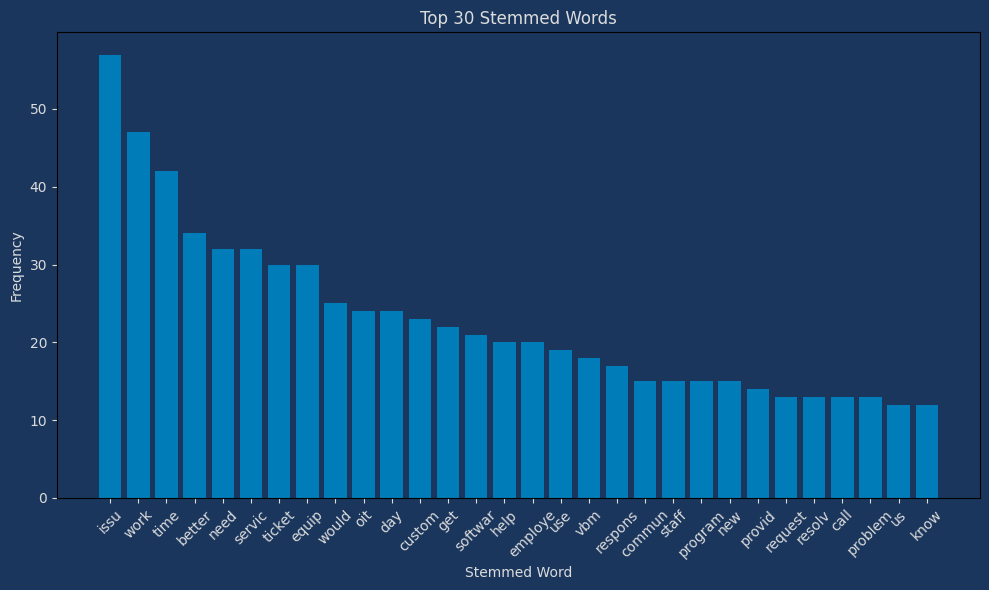

In [ ]:
plot_top_30(detractor_df)

A lot of overlap with the promoter_df, it looks like.  Below is a reminder cell for adding new stopwords and removing them from the results.  But let's move on past that for now and take a look at the list.

In [ ]:
# # Sample new words to add
# new_words = ['issu', 'get', 'manner']  # Add your custom words here

# # Call the previous add_custom_stopwords function to add the new_words above
# add_custom_stopwords(new_words)

# #Apply remove_stopwords function to 'comments_stemmed'
# promoter_df['comments_stemmed'] = promoter_df['comments_stemmed'].apply(remove_stopwords)

In [ ]:
stem_freq(detractor_df)

[('issu', 57),
 ('work', 47),
 ('time', 42),
 ('better', 34),
 ('need', 32),
 ('servic', 32),
 ('ticket', 30),
 ('equip', 30),
 ('would', 25),
 ('oit', 24),
 ('day', 24),
 ('custom', 23),
 ('get', 22),
 ('softwar', 21),
 ('help', 20),
 ('employe', 20),
 ('use', 19),
 ('vbm', 18),
 ('respons', 17),
 ('commun', 15),
 ('staff', 15),
 ('program', 15),
 ('new', 15),
 ('provid', 14),
 ('request', 13),
 ('resolv', 13),
 ('call', 13),
 ('problem', 13),
 ('us', 12),
 ('know', 12),
 ('one', 12),
 ('actual', 12),
 ('va', 12),
 ('log', 12),
 ('assist', 11),
 ('laptop', 11),
 ('user', 11),
 ('contact', 11),
 ('process', 11),
 ('abl', 11),
 ('comput', 11),
 ('access', 10),
 ('local', 10),
 ('none', 10),
 ('take', 10),
 ('chang', 10),
 ('fix', 10),
 ('account', 10),
 ('hour', 10),
 ('way', 10),
 ('updat', 9),
 ('could', 9),
 ('end', 9),
 ('person', 9),
 ('improv', 9),
 ('make', 9),
 ('mani', 9),
 ('replac', 9),
 ('solv', 9),
 ('address', 8),
 ('complet', 8),
 ('job', 8),
 ('go', 8),
 ('thing', 8),
 (

Right off the bat, we see the numbers are lower, as there are less detractors than promoters overall.  Let's export this to an excel document as before for easier searching.

In [ ]:
stem_list(detractor_df, 'detractor_stem_list')

List exported to detractor_stem_list.xlsx


Now let's start pulling some stems and comments to see the overall picture.  We'll start with the most common stem at the top of the list.

In [ ]:
get_matching_stem(detractor_df, ['time'])

,Location,Detractor Comments
36,CA - Long Beach VA Medical Center (600),resolve the issue less than 1hr. telephone calls waiting time
91,IL - Danville VA Medical Center (550),"it took from 2-29 until 4-19 to (partially) resolve my issue, most of that time waiting to be contacted by a tech to discuss the issue because he ""contacted the wrong person, then kept forgetting to contact me. tech insisted on creating two additional tickets to avoid going over his resolution time limit."
163,TN - Memphis VA Medical Center (614),"requesting things through it is a cumbersome, overly complex process. i am an acos-e and the end-user experience for on-boarding, specifically for account transfers, is horrendous. we have to place one request to have an account restored if it is deleted or disabled. then, we have to coordinate placing another ticket that goes to a different helpdesk to transfer the ticket. we had multiple accounts were removed from the ad again by the time the transfer ticket was addressed. so, we had to start the process over. we tried to have the rotation code added to the accounts as well, but in our experience only ~50% of those requests are actually completed correctly. therefore, it takes an extended period of time to get accounts transferred. this is just one of the many it related on-boarding issues we experienced this year. honestly, i am now in favor of replacing 90% of it staff with artificial intelligence as soon as the technology is more advanced. i bet ai could transfer an account in 5 seconds with more accuracy that va oit. you do not care at all about customer experience. your main priority is generating as many tickets as possible in the hopes of making it appear that you are productive than you actually are considering that many tickets are not even completed correctly. your inability to provide an effective and efficient customer experience is a waster of taxpayer money and resources."
196,,faster turnover / opening of account longer time to access open accounts
215,"TX - San Antonio, Audie L. Murphy Memorial Veterans' Hospital (671)","more timely response, completing issues thst come up as a result of interventions"
266,"NY - Montrose, Franklin Delano Roosevelt Hospital (620)",complete repairs and replacements on time. actually do your job.
304,"TX - Houston, Michael E. DeBakey VA Medical Center (580)","computers on medication carts and desks routinely malfunction by getting stuck on screens and have to be restarted, take a long time to sign you in, card readers stop working, scanners stop working, and sometimes wifi drops off, keyboards stop working. many of the carts for the respiratory department are old and need to be replaced."
380,"KY - Louisville, Robley Rex VA Medical Center (603)",have matters taken care of in a timely manner.
403,IA - Des Moines Regional Benefit Office,be more timely on responding to request. i had to follow up multiple times to get resolved.
415,VA - Hampton VA Medical Center (590),"first call resolution. the first time there is a call about an issue, it is resolved, which will result in no calling back for the same issue."


While the current briefing decks have Equipment (hardware and software), Customer Service, and IT Communication with Users, Timeliness seems to be a predominant factor for Detractors, as it was for Promoters.

Of note as well, the recommendation for "IT Communication with Users" is described as "Frequent and clear communications, eliminating “dark” periods of no IT response or follow-up."  This would seem to parallel with the Communication and Responsiveness theme of the Promoters, and seems to overlap with Timeliness. It would seem that the three themes of Customer Service, Timleiness, and Communication/Responsiveness should be repeated here with Detractors, with the addition of Equipment.  


#### Customer Service Theme

In [ ]:
cust_serv2 = cust_serv

#General Customer Service tags used previously:
#The following are all captured in the Python with the stem 'servic'. If necessary, it may be beneficial to create another function that takes in
#a pair of words, but this may be more helpful in ambiguous columns like the passives and other dataframes.
#"\"customer service\" OR \"great service\" OR \"poor service\" OR \"bad service\" OR \"excellent service\" OR \"service I received\"
#OR \"service I receive\" OR \"good service\" OR \"terrible service\" OR \"outstanding service\" OR \"horrible service\" OR
#\"better service\" OR \"improve service\" OR \"declined service\" OR \"declining service\" OR \"improved service\" OR \"improving service\"
#OR \"service they provide\" OR \"service they provided\"

#for promoter, nearly all 'servic' comments are completely relevant for the customer service theme.
#for detractor, several 'servic' comments are not about customer service. Utilizing 'servic' alone captures several customer service comments not
#captured by the above previously used tags alone, but it also captures some irrelevant comments.  The previously used tags didn't capture these
#irrelevant comments, but they also missed several comments that were relevant.  My estimation, based on the September survey data alone, was that the
#previous methodology was about 5% under an accurate "customer service" percentage, while this current method is about 5% over.  I am opting for this
#methodology because it includes all relevant comments, even though it captures some irrelevant ones.  As long as we are communicating that these
#percentages are rough estimates with some positive/negative room for error, this should be fine.  These percentages and their comments are used to provide
#overarching themes and actionable insights, so these small percentage differences should hopefully not be cause for concern.

#General Customer Service tags used previously without the term 'service':
#OR support or rude or nice or kind or disrespect or arrogant or irritated or burden
#or nice or friendly or respect or helpful or understanding or empathetic or \"good listener\" or yell or shout or condescending or swear or
#curse or (under breath)~2 or helpful or caring or \"care about\" or \"cares about\" or professional or professionalism or attentive"

In [ ]:
get_matching_stem(detractor_df, ['rude'])

,Location,Detractor Comments
452,LA - New Orleans Regional Benefit Office,customer service was excellent up until someone was very petty and another employee relayed exactly what was said. it was very rude and unnecessary.
455,OR - Portland VA Medical Center (648),"the it representative was rude, patronizing and dismissed the issue even though it continued. he was not professional in any way."
525,WY - Cheyenne VA Medical Center (442),people that work there are rude and don't want to help when i am having issues. a man just looked at me and helped someone else that was behind me in line. i think they all need to be fired because they don't know what they are doing. i have never seen such an incompetent bunch of it people in my life.


In [ ]:
get_matching_stem_exclude(detractor_df, ['servic'], ['custom'])

,Location,Detractor Comments
0,CA - Palo Alto VA Medical Center (640),if i had knowledge of what services they provided
1,AR - North Little Rock Regional Benefit Office,"i would say if they simply do their jobs they are paid to do, and that's to provide a service to the end user no matter how minute or complex."
2,,better service
3,"CA - Mather, Sacramento VA Medical Center (612A4)",faster service
4,"CA - Mather, Sacramento VA Medical Center (612A4)","maybe re-phrasing your survey question. not sure if i understood the question the way you intended. unless i have multiple choices in choosing my services, i thought oit was the only one we could go through. so does not make sense that i would recommend them, when everyone has to use them."
5,CT - Newington VA Medical Center (689A4),faster service
6,"FL - Bay Pines, C.W. Bill Young VA Medical Center (516)","more efficient, better quality equipment and service"
7,"VA - Richmond, Hunter Holmes McGuire Hospital (652)","availability of on call for the weekends to support a 24/7 hospital facility. communication regarding discontinued services such as items that have been covered by biomed for 6 months but it never mentioned that until we constantly asked for assistance only to be told we were reaching out to the wrong department. since most everything is covered by biomed, what exactly does it do?"
8,MO - Kansas City VA Medical Center (589),ask me to rate the actual service - not if i would recommend to use the service
9,NE - Grand Island VA Medical Center (636A4),you can never get service. if you have software issues you have to figure out what software you are having issues with before you can find the correct help article to read. the chat bot is the same you have to know exactly what software is causing the issue. i wish if there was a problem with vpn it would be sent out or posted on the your it site. it is so hard to figure things out.


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, detractor_df, cust_serv2, excel_filename='Detractor Customer Service Comments')

Excel file 'Detractor Customer Service Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, detractor_df, cust_serv2, min_length=10, excel_filename='Detractor Customer Service Comments 10 Or More Words')

Excel file 'Detractor Customer Service Comments 10 Or More Words.xlsx' created successfully.


# **Customer Service Detractor Percentage HERE**

##### **Customer Service Detractor Percentage**

In [ ]:
percentage(detractor_df, cust_serv2)

23.737373737373737


Above is the percentage of detractor comments that mention Customer Service.

#### Timeliness

In [ ]:
#create list of Timeliness stems
time2 = time

# #Timeliness tags used previously:
# #The following are generally negative with few stems related to positive timeliness.  MAny of these will be more useful for the detractor_df.
# # "\"too long\" OR \"to long\" OR \"too long to resolve\" OR \"to long to resolve\" OR \"too slow to fix\"
# # OR \"to slow to fix\" OR \"too long to fix\" OR \"to long to fix\" OR \"too slow to resolve\" OR \"to slow to resolve\"
# # OR \"took too long\" OR \"took to long\" OR \"was not timely\" OR \"is not timely\" OR \"took forever\" OR \"wait a long time\"
# # OR \"slow to address\" OR \"wait time\" OR \"hold time\" OR \"not quick\" OR \"should be immediate\" OR \"should be fast\" OR
# # \"should be faster\" OR \"shorten\" OR \"shortened\" OR \"should not take so long\" OR \"should not take as long\" OR \"should not be so slow\"
# # OR timeliness OR timely OR \"long time\" or wait time or priority or urgency or haste"

In [ ]:
get_matching_stem(detractor_df, time2)

,Location,Detractor Comments
17,OTHER (please specify) VACO,"quicker customer service, better comms of status of tickets. once it gets to the local site--they are quick to respond...it is the long wait before that."
36,CA - Long Beach VA Medical Center (600),resolve the issue less than 1hr. telephone calls waiting time
88,WA - Seattle VA Medical Center (663),quicker response and better communication of timeline/status
91,IL - Danville VA Medical Center (550),"it took from 2-29 until 4-19 to (partially) resolve my issue, most of that time waiting to be contacted by a tech to discuss the issue because he ""contacted the wrong person, then kept forgetting to contact me. tech insisted on creating two additional tickets to avoid going over his resolution time limit."
110,"KS - Leavenworth, Dwight D. Eisenhower VA Medical Center (589A6)","it something breaks, we need an immediate contact for help. often we need same day help but do not receive it. the process for finding who to call is very confusing and complicated. recently we had upgrades done to our web connections for cerner. they plugged the fax into the wrong port and it took days to diagnose and fix. this should be more simple."
135,NY - Bath VA Medical Center (528A6),more personnel to make things faster
153,TX - Dallas VA Medical Center (549),faster service; improved customer service
163,TN - Memphis VA Medical Center (614),"requesting things through it is a cumbersome, overly complex process. i am an acos-e and the end-user experience for on-boarding, specifically for account transfers, is horrendous. we have to place one request to have an account restored if it is deleted or disabled. then, we have to coordinate placing another ticket that goes to a different helpdesk to transfer the ticket. we had multiple accounts were removed from the ad again by the time the transfer ticket was addressed. so, we had to start the process over. we tried to have the rotation code added to the accounts as well, but in our experience only ~50% of those requests are actually completed correctly. therefore, it takes an extended period of time to get accounts transferred. this is just one of the many it related on-boarding issues we experienced this year. honestly, i am now in favor of replacing 90% of it staff with artificial intelligence as soon as the technology is more advanced. i bet ai could transfer an account in 5 seconds with more accuracy that va oit. you do not care at all about customer experience. your main priority is generating as many tickets as possible in the hopes of making it appear that you are productive than you actually are considering that many tickets are not even completed correctly. your inability to provide an effective and efficient customer experience is a waster of taxpayer money and resources."
196,,faster turnover / opening of account longer time to access open accounts
288,IA - Des Moines VA Medical Center (636A6),"more access to web-ta, quicker logins to apps. this is a 24 hour hospital."


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, detractor_df, time2, excel_filename='Detractor Timeliness Comments')

Excel file 'Detractor Timeliness Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, detractor_df, time2, min_length=10, excel_filename='Detractor Timeliness Comments 10 Or More Words')

Excel file 'Detractor Timeliness Comments 10 Or More Words.xlsx' created successfully.


# **Timeliness Detractor Percentage HERE**

##### **Timeliness Detractor Percentage**

In [ ]:
percentage(detractor_df, time2)

12.626262626262626


Above is the percentage of detractor comments that mention Timeliness.

#### Communication and Responsiveness Theme

In [ ]:
#create list of Communication and Responsiveness stems
comm_resp2 = comm_resp

# #Communication tags used previously:
# # Communication or communicate or \"follow up\" or \"follow-up\" or follow or response or respond or process or instructions or
# # steps or \"back to you\" or \"respond back\" or \"reply back\" or (follow up response)~5 or \"listen to\" or
# # \"listened to\" or understand or convey or ((IT| tech) and (lingo| jargon| language| terms| speech)) or attentive",

# #Responsiveness tags used previously:
# # "\"not responsive\" OR \"very responsive\" OR \"not at all responsive\" OR \"did not hear\" OR \"didn't hear\" OR
# # \"delayed response\" OR \"slow response\" OR \"no response\" OR \"slow to respond\" OR response OR \"quick to respond\"
# # OR \"good response\" OR \"bad response\" OR \"faster response\" OR \"response time\" OR responsiveness OR responsive OR
# # \"rapid response\" OR \"fast to respond\" OR \"timeliness of response\" OR \"ineffective response\" or
# # ((fast| quick| speed| short| slow| long| time) and response) or respond or reply or response or
# # ((fast| quick| speed| short| slow| long| time) and reply) or ((fast| quick| speed| short| slow| long| time) and respond) or prompt",

# #"Understand" is already listed under Customer Service cust_serv list above.
# #Many of the tags under Responsiveness are more about Timeliness.

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, detractor_df, comm_resp2, excel_filename='Detractor Communication Responsiveness Comments')

Excel file 'Detractor Communication Responsiveness Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, detractor_df, comm_resp2, min_length=10, excel_filename='Detractor Communication Responsiveness Comments 10 Or More Words')

Excel file 'Detractor Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


# **Communication and Responsiveness Detractor Percentage HERE**

##### **Communication and Responsivness Detractor Percentage**

In [ ]:
percentage(detractor_df, comm_resp2)

23.737373737373737


Above is the percentage of detractor comments that mention Communication and Responsiveness

### Equipment Theme

In [ ]:
#hardware equipment tag list
equip_hard = ['hardwar', 'comput', 'computer', 'devic', 'laptop', 'desktop', 'screen', 'keyboard', 'mous', 'monitor', 'cord', 'cow',
             ('telemetry', 'board'), ('telemetri', 'board'), ('signatur', 'pad'), 'tablet', 'ipad', 'page', 'drive', 'cell', 'cellphone',
              ('phone', 'call'), 'dock', 'mic', 'microphon', 'touchpad', 'trackpad', 'cable', 'cabl', 'fax', 'printer', 'scanner',
              'gfe', 'ram', 'machine', 'machineri', 'machin', 'repair']

# #Hardware tags in this script previously
# equip_hard = ['equip', 'comput', 'computer', 'laptop', 'printer', 'monitor', 'hardwar', 'desktop', 'keyboard', 'mous', 'cow', 'wheel', 'telemetry',
#               'telemetri', 'tablet', 'ipad',  'page', 'signatur', 'devic', 'screen', 'cell', 'gfe', 'drive', 'repair', 'ram', 'driver', 'bcma',
#              'cellphon', 'microphon', 'mic', 'touchpad', 'trackpad', 'cable', 'cabl', 'fax', 'scanner', 'ram', 'machine', 'machineri', 'machin',
#              ]

#Hardware tags provided by CFI:
#"hardware or computer or device or laptop or desktop or screen or keyboard or mouse or monitor or cord or COW or COW's
#or \"computer on wheels\" or \"telemetry board\" or \"signature pad\" or tablet or ipad or pager or drive or cellphone
#or (phone && call) or dock or mic or microphone or touchpad or trackpad or cable or fax or printer or scanner or GFE or RAM or machine or repair",

#software equipment tag list
equip_soft = ['softwar', 'program', 'programm', 'app', 'application', 'bdn', 'boss-e', 'boss', 'chi', 'cag', 'ctx', 'citrix', 'ht', 'jvl',
              '0365', 'rescue', 'tic', 'vatas', 'vbms', 'vcl', 'vista', 'v-cprs', 'cprs' 'v-comp', 'comp', 'vpn', 'lynx', 'glitch', 'glitchi', 'lag',
              'crash', 'freez', 'bug', 'boot', 'drop', 'laten', 'leaf', 'snow']

# #Software tags om this script previously:
# equip_soft = ['softwar', 'program', 'programm', 'app', 'application', 'bdn', 'boss-e', 'boss', 'chi', 'cag', 'ctx', 'citrix', 'ht', 'jvl',
#               '0365', 'rescue', 'tic', 'vatas', 'vbms', 'vcl', 'vista', 'v-cprs', 'cprs' 'v-comp', 'vpn', 'lynx', 'glitch', 'glitchi', 'lag',
#               'crash', 'freez', 'bug', 'boot', 'laten', 'leaf', 'snow', 'dragon', 'capri', 'bcma']

#software tags provided by CFI:
#"software  or program or app or application or BDN or BOSS-E or BOSS or CHI or CAG or CTX or Citrix or HT or JVL or O365 or RESCUE
#or TIC or VATAS or VBMS or VCL or VistA or V-CPRS or CPRS or V-COMP or COMP or VPN or lynx or glitch or lag or crash or freeze
#or bug or(black screen)~2 or (blue screen)~2 or (white screen)~2 or boot or drop or laten or LEAF or SNOW”

#consider how to incorporate 'screen', and 'black', 'blue', 'white'. None of these showed up as pairs in September, and most references to
#screens were about screen-sharing, none about screen crashes.

#Considering adding to equip_soft:
#['dragon', 'capri', bcma', 'updat', 'outdat', 'yourit', 'network', 'internet', 'password', 'portal', 'wifi', 'http']

equip = equip_hard + equip_soft

In [ ]:
get_matching_stem(detractor_df, ['drop'])

,Location,Detractor Comments
304,"TX - Houston, Michael E. DeBakey VA Medical Center (580)","computers on medication carts and desks routinely malfunction by getting stuck on screens and have to be restarted, take a long time to sign you in, card readers stop working, scanners stop working, and sometimes wifi drops off, keyboards stop working. many of the carts for the respiratory department are old and need to be replaced."
1058,CA - Palo Alto VA Medical Center (640),decreasing vpn load times and drop off


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, detractor_df, equip_hard, excel_filename='Detractor Hardware Comments')

Excel file 'Detractor Hardware Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, detractor_df, equip_hard, min_length=10, excel_filename='Detractor Hardware Comments 10 Or More Words')

Excel file 'Detractor Hardware Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, detractor_df, equip_soft, excel_filename='Detractor Software Comments')

Excel file 'Detractor Software Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, detractor_df, equip_soft, min_length=10, excel_filename='Detractor Software Comments 10 Or More Words')

Excel file 'Detractor Software Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, detractor_df, cust_serv2, excel_filename='Detractor Customer Service Comments')

Excel file 'Detractor Customer Service Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, detractor_df, cust_serv2, min_length=10, excel_filename='Detractor Customer Service Comments 10 Or More Words')

Excel file 'Detractor Customer Service Comments 10 Or More Words.xlsx' created successfully.


# **Equipment Detractor Percentages HERE**

##### **Equipment Detractor Percentage**

In [ ]:
percentage(detractor_df, equip)

23.737373737373737


Above is the percentage of detractor comments that mention Equipment (hardware or software)

##### **Hardware Detractor Percentage**

In [ ]:
percentage(detractor_df, equip_hard)

16.666666666666664


Above is the percentage of detractor comments that mention hardware.

##### **Software Detractor Percentage**

In [ ]:
percentage(detractor_df, equip_soft)

10.1010101010101


Above is the percentage of detractor comments that mention software.

#### Overlap with Detractor Communication/Responsiveness and Timeliness Themes

In [ ]:
#join the time and comm_resp lists
time_comm_resp2 = time2 + comm_resp2

#Run function to pull percentage of respondents
time_comm_percent2 = (len(get_matching_stem(detractor_df, time_comm_resp2)) / len(detractor_df)) * 100

#print percentage
print(time_comm_percent2)

30.808080808080806


This is the percentage of respondents who discuss any and all of the stemmed words from both the Timeliness and Communication and Responsiveness themes.

Again, we will divide this out to see more precisely the percentages.

In [ ]:
#assign variable to length of promoter respondents mentioning Responsiveness/Communication only (not Timeliness) divided by total respondents
communication2 = (len(get_matching_stem_exclude(detractor_df, comm_resp2, time2)) / len(detractor_df)) * 100
print(communication2)

18.68686868686869


This is the percentage of detractor respondents who reference Communication and Responsiveness without referencing Timeliness

In [ ]:
#assign variable to length of promoter respondents mentioning Timeliness only (not Responsiveness/Communication) divided by total respondents
timeliness2 = (len(get_matching_stem_exclude(detractor_df, time2, comm_resp2)) / len(detractor_df)) * 100
print(timeliness2)

4.545454545454546


This is the perecentage of detractor respondents who reference Timeliness without Communication/Responsiveness

In [ ]:
#subtract sum of communication and timeliness percentages from combined percentage
time_comm_percent2 - (communication2 + timeliness2)

7.575757575757571

This is the percentage of detractor respondents who reference both Timeliness and Communication/Responsiveness.

### **Passive Comment Analysis**

In [ ]:
get_df_list(df_list)

passive_df
euo_promoter_df
euo_detractor_df
yourit_df
yourit_promoter_df
yourit_detractor_df
promoter_df
detractor_df
esd_promoter_df
df


In [ ]:
function_list

['plot_top_30(df)',
 'stem_freq(df)',
 'stem_list(df, title)',
 'get_matching_stem(df, list of stems)',
 'percentage(df, list of stems)',
 'get_matching_stem_exclude(df, list of stems to include, list of stems to exclude)',
 'get_df_list(df_list)']

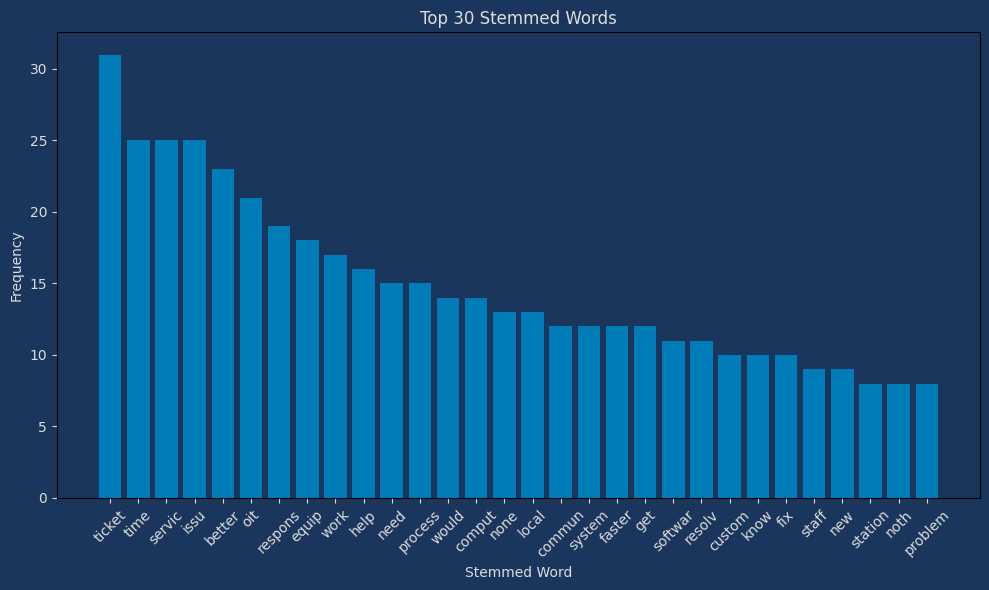

In [ ]:
plot_top_30(passive_df)

Again, a lot of overlap in terms here.  Since the passives will be in between the promoters and the detractors, and since the question for this dataframe is about areas of improvement, it will make sense to reuse the stem lists we created for the Detractor Comment Analysis above.

In [ ]:
stem_freq(passive_df)

[('ticket', 31),
 ('time', 25),
 ('servic', 25),
 ('issu', 25),
 ('better', 23),
 ('oit', 21),
 ('respons', 19),
 ('equip', 18),
 ('work', 17),
 ('help', 16),
 ('need', 15),
 ('process', 15),
 ('would', 14),
 ('comput', 14),
 ('none', 13),
 ('local', 13),
 ('commun', 12),
 ('system', 12),
 ('faster', 12),
 ('get', 12),
 ('softwar', 11),
 ('resolv', 11),
 ('custom', 10),
 ('know', 10),
 ('fix', 10),
 ('staff', 9),
 ('new', 9),
 ('station', 8),
 ('noth', 8),
 ('problem', 8),
 ('call', 8),
 ('contact', 8),
 ('chang', 8),
 ('understand', 7),
 ('quicker', 7),
 ('request', 7),
 ('could', 7),
 ('use', 7),
 ('wait', 7),
 ('thing', 7),
 ('one', 7),
 ('updat', 7),
 ('complet', 7),
 ('day', 7),
 ('improv', 6),
 ('assist', 6),
 ('instead', 6),
 ('due', 6),
 ('depart', 6),
 ('person', 6),
 ('offic', 6),
 ('think', 6),
 ('abl', 6),
 ('way', 6),
 ('see', 6),
 ('mani', 5),
 ('team', 5),
 ('provid', 5),
 ('requir', 5),
 ('avail', 5),
 ('laptop', 5),
 ('facil', 5),
 ('sometim', 5),
 ('tri', 5),
 ('close

In [ ]:
stem_list(passive_df, 'passive_stem_list')

List exported to passive_stem_list.xlsx


#### Customer Service Theme

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, passive_df, cust_serv2, excel_filename='Passive Customer Service Comments')

Excel file 'Passive Customer Service Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, cust_serv2, min_length=10, excel_filename='Passive Customer Service Comments 10 Or More Words')

Excel file 'Passive Customer Service Comments 10 Or More Words.xlsx' created successfully.


# **Customer Service Passive Percentages HERE**

##### **Customer Service Passive Percentage**

In [ ]:
percentage(passive_df, cust_serv2)

15.263157894736842


Above is the percentage of passive comments that mention Customer Service.

#### Timeliness Theme

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, passive_df, time2, excel_filename='Passive Timeliness Comments')

Excel file 'Passive Timeliness Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, time2, min_length=10, excel_filename='Passive Timeliness Comments 10 Or More Words')

Excel file 'Passive Timeliness Comments 10 Or More Words.xlsx' created successfully.


# **Timeliness Passive Percentages HERE**

##### **Timeliness Passive Percentage**

In [ ]:
percentage(passive_df, time2)

16.842105263157894


Above is the percentage of passive comments that mention Timeliness.

#### Communication and Responsiveness Theme

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, passive_df, comm_resp2, excel_filename='Passive Communication Responsiveness Comments')

Excel file 'Passive Communication Responsiveness Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, comm_resp2, min_length=10, excel_filename='Passive Communication Responsiveness Comments 10 Or More Words')

Excel file 'Passive Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


# **Communication and Responsiveness Passive Percentages HERE**

##### **Communication and Responsivness Passive Percentage**

In [ ]:
percentage(passive_df, comm_resp2)

23.684210526315788


Above is the percentage of passive comments that mention Communication and Responsiveness

#### Equipment Theme

##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, passive_df, equip_hard, excel_filename='Passive Hardware Comments')

Excel file 'Passive Hardware Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, equip_hard, min_length=10, excel_filename='Passive Hardware Comments 10 Or More Words')

Excel file 'Passive Hardware Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, passive_df, equip_soft, excel_filename='Passive Software Comments')

Excel file 'Passive Software Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, equip_soft, min_length=10, excel_filename='Passive Software Comments 10 Or More Words')

Excel file 'Passive Software Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, passive_df, cust_serv2, excel_filename='Passive Customer Service Comments')

Excel file 'Passive Customer Service Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, passive_df, cust_serv2, min_length=10, excel_filename='Passive Customer Service Comments 10 Or More Words')

Excel file 'Passive Customer Service Comments 10 Or More Words.xlsx' created successfully.


##### **Equipment Passive Percentage**

In [ ]:
percentage(passive_df, equip)

17.894736842105264


Above is the percentage of detractor comments that mention Equipment

#### Overlap with Passive Communication/Responsiveness and Timeliness Themes

In [ ]:
#Run function to pull percentage of respondents
time_comm_percent3 = (len(get_matching_stem(passive_df, time_comm_resp2)) / len(passive_df)) * 100

#print percentage
print(time_comm_percent3)

30.526315789473685


This is the percentage of respondents who discuss any and all of the stemmed words from both the Timeliness and Communication and Responsiveness themes.

Again, we will divide this out to see more precisely the percentages.

In [ ]:
#assign variable to length of promoter respondents mentioning Responsiveness/Communication only (not Timeliness) divided by total respondents
communication3 = (len(get_matching_stem_exclude(passive_df, comm_resp2, time2)) / len(passive_df)) * 100
print(communication3)

14.736842105263156


This is the percentage of passive respondents who reference Communication and Responsiveness without referencing Timeliness

In [ ]:
#assign variable to length of promoter respondents mentioning Timeliness only (not Responsiveness/Communication) divided by total respondents
timeliness3 = (len(get_matching_stem_exclude(passive_df, time2, comm_resp2)) / len(passive_df)) * 100
print(timeliness3)

5.263157894736842


This is the perecentage of detractor respondents who reference Timeliness without Communication/Responsiveness

In [ ]:
#subtract sum of communication and timeliness percentages from combined percentage
time_comm_percent3 - (communication3 + timeliness3)

10.526315789473689

This is the percentage of passive respondents who reference both Timeliness and Communication/Responsiveness.

### **ESD Comment Analysis**

#### **Positive Comment Analysis**

In [ ]:
esd_promoter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 51 to 1545
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESD Rating          103 non-null    float64
 1   NPS                 103 non-null    float64
 2   Location            103 non-null    object 
 3   ESD Compliment      103 non-null    object 
 4   comments_tokenized  103 non-null    object 
 5   comments_stemmed    103 non-null    object 
dtypes: float64(2), object(4)
memory usage: 5.6+ KB


In [ ]:
function_list

['plot_top_30(df)',
 'stem_freq(df)',
 'stem_list(df, title)',
 'get_matching_stem(df, list of stems)',
 'percentage(df, list of stems)',
 'get_matching_stem_exclude(df, list of stems to include, list of stems to exclude)',
 'get_df_list(df_list)']

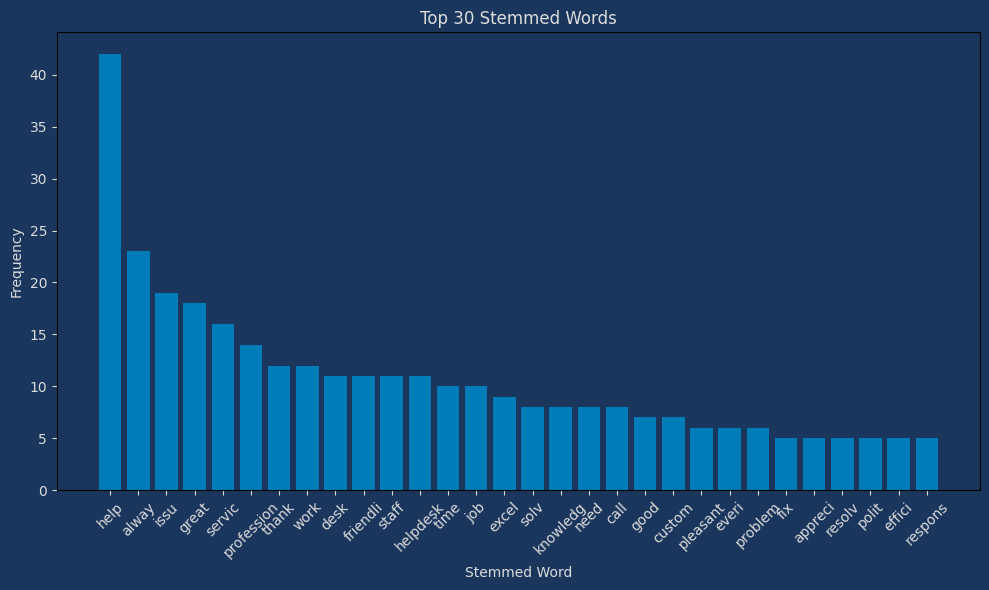

In [ ]:
plot_top_30(esd_promoter_df)

In [ ]:
stem_freq(esd_promoter_df)

[('help', 42),
 ('alway', 23),
 ('issu', 19),
 ('great', 18),
 ('servic', 16),
 ('profession', 14),
 ('thank', 12),
 ('work', 12),
 ('desk', 11),
 ('friendli', 11),
 ('staff', 11),
 ('helpdesk', 11),
 ('time', 10),
 ('job', 10),
 ('excel', 9),
 ('solv', 8),
 ('knowledg', 8),
 ('need', 8),
 ('call', 8),
 ('good', 7),
 ('custom', 7),
 ('pleasant', 6),
 ('everi', 6),
 ('problem', 6),
 ('fix', 5),
 ('appreci', 5),
 ('resolv', 5),
 ('polit', 5),
 ('effici', 5),
 ('respons', 5),
 ('person', 5),
 ('team', 5),
 ('nice', 4),
 ('patienc', 4),
 ('guy', 4),
 ('patient', 4),
 ('know', 4),
 ('enterpris', 4),
 ('quick', 4),
 ('ticket', 4),
 ('make', 4),
 ('address', 4),
 ('process', 4),
 ('peopl', 3),
 ('respect', 3),
 ('amaz', 3),
 ('fast', 3),
 ('much', 3),
 ('talk', 3),
 ('follow', 3),
 ('request', 3),
 ('last', 3),
 ('will', 3),
 ('question', 3),
 ('contact', 3),
 ('local', 3),
 ('like', 3),
 ('comput', 3),
 ('get', 3),
 ('understand', 3),
 ('abl', 3),
 ('keep', 3),
 ('easi', 3),
 ('respond', 2),

On quick glance, I see significant overlap between the top stems here and the top stems in the themes created above.  Let's try to see how these already created themes will apply here.

In [ ]:
stem_list(esd_promoter_df, 'ESD Promoter Stems')

List exported to esd promoter stems.xlsx


In [ ]:
get_matching_stem(esd_promoter_df, comm_resp2)

,Location,ESD Compliment
51,NE - Omaha VA Medical Center (636),you have always responded back quickly and timely. thank you.
60,,prompt service
83,,"i forgot the names of few people that help me, they are so nice and step by step they help me, they have the patience to help me to solve my issues on that time."
165,MD - Baltimore VA Medical Center (512),the it professional is always very helpful and pleasant. there is usually a follow up for ensuring that my concerns./requests are resolved to my satisfaction.
446,DC - Washington VA Medical Center (688),very responsive and efficient
465,"MA - Boston, Jamaica Plain VA Medical Center (523)",the helpdesk is quick to respond and always solves any issue i have from forgotten piv card to software not working and needing routing to local it.
493,SC - Columbia Regional Benefit Office,"i feel like my ticket got lost in the shuffle, i sent two follow on requests and no one reached out until mr. bolden saw it had been pending so long."
516,TN - Nashville Regional Benefit Office,"the tool is just too busy and it is hard to figure out how to just submit a trouble ticket. then the questions that you ask don't make sense to someone who is not a computer person. maybe add a drop down menu that says terms that a non-computer tech would use like: ""i can't open the program."" ""i'm getting a vbms error"", ""i don't know how to troubleshoot this."" ...."
594,"NC - Salisbury, W.G. (Bill) Hefner VA Medical Center (659)","for the most part it addresses issues, problems etc. fairly promptly"
648,OTHER (please specify) Remote,thank you for changing processes to retrieve va member's team meeting recordings.


In [ ]:
get_matching_stem(esd_promoter_df, equip)

,Location,ESD Compliment
155,"KY - Louisville, Robley Rex VA Medical Center (603)",these guys were very professional and got my issue fixed really fast and actually helped us with a printer that wouldnt work that morning as well. thank you all so much
465,"MA - Boston, Jamaica Plain VA Medical Center (523)",the helpdesk is quick to respond and always solves any issue i have from forgotten piv card to software not working and needing routing to local it.
516,TN - Nashville Regional Benefit Office,"the tool is just too busy and it is hard to figure out how to just submit a trouble ticket. then the questions that you ask don't make sense to someone who is not a computer person. maybe add a drop down menu that says terms that a non-computer tech would use like: ""i can't open the program."" ""i'm getting a vbms error"", ""i don't know how to troubleshoot this."" ...."
1149,WI - Tomah VA Medical Center (676),thank you all for making it so easy. i do not feel like a dummy when i call because you guys are always so courteous and professional and speak so reassuringly that it calms down my computer related stress. you guys are great! thanks so much!


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, esd_promoter_df, equip_hard, excel_filename='ESD Promoter Hardware Comments')

Excel file 'ESD Promoter Hardware Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, esd_promoter_df, equip_hard, min_length=10, excel_filename='ESD Promoter Hardware Comments 10 Or More Words')

Excel file 'ESD Promoter Hardware Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, esd_promoter_df, equip_soft, excel_filename='ESD Promoter Software Comments')

Excel file 'ESD Promoter Software Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, esd_promoter_df, equip_soft, min_length=10, excel_filename='ESD Promoter Software Comments 10 Or More Words')

Excel file 'ESD Promoter Software Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, esd_promoter_df, cust_serv2, min_length=10, excel_filename='ESD Promoter Customer Service Comments 10 Or More Words')

Excel file 'ESD Promoter Customer Service Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, esd_promoter_df, time2, min_length=10, excel_filename='ESD Promoter Timeliness Comments 10 Or More Words')

Excel file 'ESD Promoter Timeliness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, esd_promoter_df, comm_resp2, min_length=10, excel_filename='ESD Promoter Communication Responsiveness Comments 10 Or More Words')

Excel file 'ESD Promoter Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
percentage(esd_promoter_df, cust_serv2)

41.74757281553398


This is the percentage of ESD promoter respondents who mentioned Customer Service.

In [ ]:
percentage(esd_promoter_df, time2)

10.679611650485436


This is the percentage of ESD promoter respondents who mentioned Timeliness.

In [ ]:
percentage(esd_promoter_df, comm_resp2)

16.50485436893204


This is the percentage of ESD promoter respondents who mentioned Communication/Responsiveness.

In [ ]:
percentage(esd_promoter_df, equip)

3.8834951456310676


This is the percentage of ESD promoter respondents who mentioned Equipment.

#### **Negative Comment Analysis**

In [ ]:
esd_detractor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 18 to 1392
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESD Rating          15 non-null     float64
 1   NPS                 15 non-null     float64
 2   Location            15 non-null     object 
 3   ESD Improvement     15 non-null     object 
 4   comments_tokenized  15 non-null     object 
 5   comments_stemmed    15 non-null     object 
dtypes: float64(2), object(4)
memory usage: 840.0+ bytes


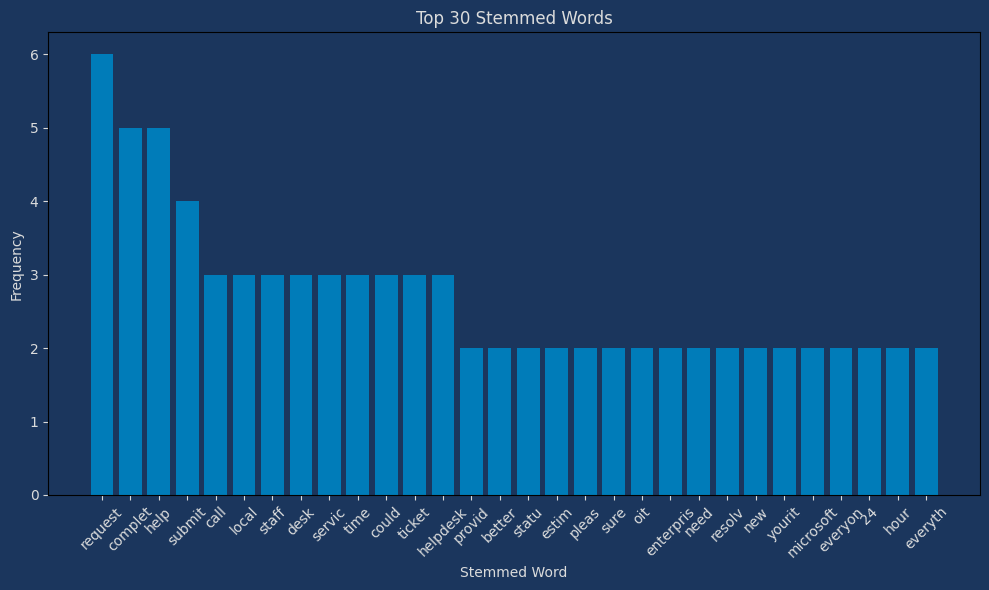

In [ ]:
plot_top_30(esd_detractor_df)

In [ ]:
stem_freq(esd_detractor_df)

[('request', 6),
 ('complet', 5),
 ('help', 5),
 ('submit', 4),
 ('call', 3),
 ('local', 3),
 ('staff', 3),
 ('desk', 3),
 ('servic', 3),
 ('time', 3),
 ('could', 3),
 ('ticket', 3),
 ('helpdesk', 3),
 ('provid', 2),
 ('better', 2),
 ('statu', 2),
 ('estim', 2),
 ('pleas', 2),
 ('sure', 2),
 ('oit', 2),
 ('enterpris', 2),
 ('need', 2),
 ('resolv', 2),
 ('new', 2),
 ('yourit', 2),
 ('microsoft', 2),
 ('everyon', 2),
 ('24', 2),
 ('hour', 2),
 ('everyth', 2),
 ('access', 2),
 ('assign', 2),
 ('updat', 1),
 ('via', 1),
 ('email', 1),
 ('date', 1),
 ('commun', 1),
 ('relay', 1),
 ('inform', 1),
 ('gather', 1),
 ('redirect', 1),
 ('especi', 1),
 ('work', 1),
 ('stoppag', 1),
 ('would', 1),
 ('benefit', 1),
 ('list', 1),
 ('respons', 1),
 ('oi', 1),
 ('perform', 1),
 ('action', 1),
 ('last', 1),
 ('experi', 1),
 ('ago', 1),
 ('explain', 1),
 ('appear', 1),
 ('abl', 1),
 ('want', 1),
 ('believ', 1),
 ('least', 1),
 ('make', 1),
 ('attempt', 1),
 ('issu', 1),
 ('touch', 1),
 ('end', 1),
 ('use

In [ ]:
stem_list(esd_detractor_df, 'ESD Detractor Stems')

List exported to esd detractor stems.xlsx


In [ ]:
get_matching_stem(esd_detractor_df, cust_serv2)

,Location,ESD Improvement
1007,"NC - Asheville, Charles George VA Medical Center (637)",please ask that customer service representatives speak slowly and distinctly. sometimes they mumble through and i have no idea what they are saying.


In [ ]:
get_matching_stem(esd_detractor_df, time2)

,Location,ESD Improvement
163,TN - Memphis VA Medical Center (614),"they are completely out of touch with the end user. as one example, if we have a new woc call the helpdesk to have their account enabled so they can log-in, the helpdesk immediately tells them to go to yourit to request microsoft office. however, everyone at the local level in the real world knows that it takes ~24 hours because everything in the ad syncs and you can access yourit. most trainees cannot self-request the microsoft access for 24 hours after their first initial sign-in. the helpdesk seems completely mystified by this reality."


In [ ]:
get_matching_stem(esd_detractor_df, comm_resp2)

,Location,ESD Improvement
18,OTHER (please specify) colorado springs Colorado,"provide better status update via email, date of estimated completion, communicate once request has been completed"
111,"GA - Decatur, Atlanta VA Medical Center (508)",the it help desk would benefit from a list of responsible oi&t services that perform requested actions.


In [ ]:
get_matching_stem(esd_detractor_df, equip)

,Location,ESD Improvement
250,OK - Oklahoma City VA Medical Center (635),the person that answers the phone could be more helpful as not everyone can navigate their program as they can


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, esd_detractor_df, equip_hard, excel_filename='ESD Detractor Hardware Comments')

Excel file 'ESD Detractor Hardware Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, esd_detractor_df, equip_hard, min_length=10, excel_filename='ESD Detractor Hardware Comments 10 Or More Words')

Excel file 'ESD Detractor Hardware Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, esd_detractor_df, equip_soft, excel_filename='ESD Detractor Software Comments')

Excel file 'ESD Detractor Software Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, esd_detractor_df, equip_soft, min_length=10, excel_filename='ESD Detractor Software Comments 10 Or More Words')

Excel file 'ESD Detractor Software Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, esd_detractor_df, cust_serv2, min_length=10, excel_filename='ESD Detractor Customer Service Comments 10 Or More Words')

Excel file 'ESD Detractor Customer Service Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, esd_detractor_df, time2, min_length=10, excel_filename='ESD Detractor Timeliness Comments 10 Or More Words')

Excel file 'ESD Detractor Timeliness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, esd_detractor_df, comm_resp2, min_length=10, excel_filename='ESD Detractor Communication Responsiveness Comments 10 Or More Words')

Excel file 'ESD Detractor Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
percentage(esd_detractor_df, cust_serv2)

6.666666666666667


This is the percentage of ESD detractor respondents who mentioned Customer Service.

In [ ]:
percentage(esd_detractor_df, time2)

6.666666666666667


This is the percentage of ESD detractor respondents who mentioned Timeliness.

In [ ]:
percentage(esd_detractor_df, comm_resp2)

13.333333333333334


This is the percentage of ESD detractor respondents who mentioned Communication/Responsiveness.

In [ ]:
percentage(esd_detractor_df, equip)

6.666666666666667


This is the percentage of ESD detractor respondents who mentioned Equipment.

### **EUO Comment Analysis**

#### **Positive Comment Analysis**

In [ ]:
euo_promoter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 4 to 1545
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EUO Rating          149 non-null    float64
 1   NPS                 149 non-null    float64
 2   Location            149 non-null    object 
 3   EUO Compliment      149 non-null    object 
 4   comments_tokenized  149 non-null    object 
 5   comments_stemmed    149 non-null    object 
dtypes: float64(2), object(4)
memory usage: 8.1+ KB


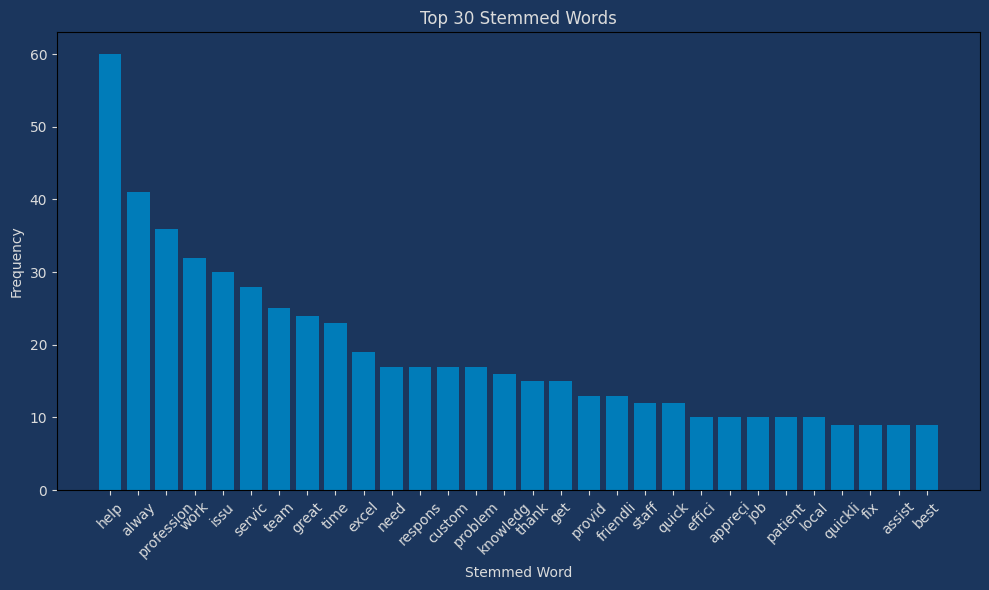

In [ ]:
plot_top_30(euo_promoter_df)

In [ ]:
stem_freq(euo_promoter_df)

[('help', 60),
 ('alway', 41),
 ('profession', 36),
 ('work', 32),
 ('issu', 30),
 ('servic', 28),
 ('team', 25),
 ('great', 24),
 ('time', 23),
 ('excel', 19),
 ('need', 17),
 ('respons', 17),
 ('custom', 17),
 ('problem', 17),
 ('knowledg', 16),
 ('thank', 15),
 ('get', 15),
 ('provid', 13),
 ('friendli', 13),
 ('staff', 12),
 ('quick', 12),
 ('effici', 10),
 ('appreci', 10),
 ('job', 10),
 ('patient', 10),
 ('local', 10),
 ('quickli', 9),
 ('fix', 9),
 ('assist', 9),
 ('best', 9),
 ('resolv', 9),
 ('commun', 8),
 ('well', 8),
 ('oit', 7),
 ('respond', 7),
 ('beyond', 7),
 ('will', 7),
 ('keep', 7),
 ('amaz', 7),
 ('top', 6),
 ('easi', 6),
 ('equip', 6),
 ('va', 6),
 ('realli', 6),
 ('make', 6),
 ('new', 6),
 ('extrem', 6),
 ('solv', 6),
 ('one', 6),
 ('go', 6),
 ('abl', 6),
 ('depart', 5),
 ('laptop', 5),
 ('good', 5),
 ('care', 5),
 ('manner', 5),
 ('ensur', 5),
 ('mr', 5),
 ('person', 5),
 ('goe', 4),
 ('prompt', 4),
 ('robert', 4),
 ('ticket', 4),
 ('question', 4),
 ('process', 4

In [ ]:
stem_list(euo_promoter_df, 'EUO Promoter Stems')

List exported to euo promoter stems.xlsx


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, euo_promoter_df, equip_hard, excel_filename='EUO Promoter Hardware Comments')

Excel file 'EUO Promoter Hardware Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_promoter_df, equip_hard, min_length=10, excel_filename='EUO Promoter Hardware Comments 10 Or More Words')

Excel file 'EUO Promoter Hardware Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, euo_promoter_df, equip_soft, excel_filename='EUO Software Comments')

Excel file 'EUO Software Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_promoter_df, equip_soft, min_length=10, excel_filename='EUO Promoter Software Comments 10 Or More Words')

Excel file 'EUO Promoter Software Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_promoter_df, cust_serv2, min_length=10, excel_filename='EUO Promoter Customer Service Comments 10 Or More Words')

Excel file 'EUO Promoter Customer Service Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_promoter_df, time2, min_length=10, excel_filename='EUO Promoter Timeliness Comments 10 Or More Words')

Excel file 'EUO Promoter Timeliness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_promoter_df, comm_resp2, min_length=10, excel_filename='EUO Promoter Communication Responsiveness Comments 10 Or More Words')

Excel file 'EUO Promoter Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
percentage(euo_promoter_df, cust_serv2)

44.966442953020135


This is the percentage of EUO promoter respondents who mentioned Customer Service.

In [ ]:
percentage(euo_promoter_df, time2)

16.10738255033557


This is the percentage of EUO promoter respondents who mentioned Timeliness.

In [ ]:
euo_detractor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 2 to 1420
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EUO Rating          28 non-null     float64
 1   NPS                 28 non-null     float64
 2   Location            28 non-null     object 
 3   EUO Improvement     28 non-null     object 
 4   comments_tokenized  28 non-null     object 
 5   comments_stemmed    28 non-null     object 
dtypes: float64(2), object(4)
memory usage: 1.5+ KB


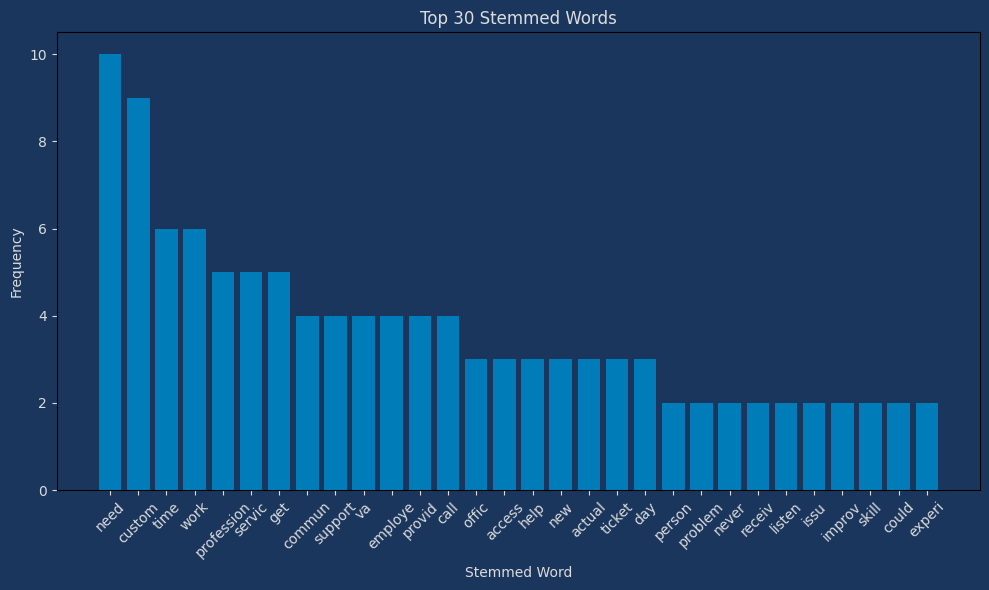

In [ ]:
plot_top_30(euo_detractor_df)

In [ ]:
stem_freq(euo_detractor_df)

[('need', 10),
 ('custom', 9),
 ('time', 6),
 ('work', 6),
 ('profession', 5),
 ('servic', 5),
 ('get', 5),
 ('commun', 4),
 ('support', 4),
 ('va', 4),
 ('employe', 4),
 ('provid', 4),
 ('call', 4),
 ('offic', 3),
 ('access', 3),
 ('help', 3),
 ('new', 3),
 ('actual', 3),
 ('ticket', 3),
 ('day', 3),
 ('person', 2),
 ('problem', 2),
 ('never', 2),
 ('receiv', 2),
 ('listen', 2),
 ('issu', 2),
 ('improv', 2),
 ('skill', 2),
 ('could', 2),
 ('experi', 2),
 ('peopl', 2),
 ('comput', 2),
 ('clinician', 2),
 ('vha', 2),
 ('care', 2),
 ('system', 2),
 ('oit', 2),
 ('particular', 2),
 ('say', 2),
 ('monitor', 2),
 ('one', 2),
 ('within', 2),
 ('tell', 2),
 ('deal', 2),
 ('attitud', 2),
 ('chang', 2),
 ('wise', 2),
 ('knowledg', 2),
 ('done', 2),
 ('name', 2),
 ('use', 2),
 ('staff', 2),
 ('avail', 2),
 ('better', 2),
 ('train', 2),
 ('like', 2),
 ('tri', 1),
 ('knock', 1),
 ('door', 1),
 ('greet', 1),
 ('mgmt', 1),
 ('local', 1),
 ('cannot', 1),
 ('solv', 1),
 ('request', 1),
 ('treat', 1),


In [ ]:
stem_list(euo_detractor_df, 'EUO Detractor Stems')

List exported to euo detractor stems.xlsx


In [ ]:
get_matching_stem(euo_detractor_df, cust_serv2)

,Location,EUO Improvement
3,MD - Baltimore VA Medical Center (512),we need access to mgmt when our local professional cannot solve a problem.
91,IL - Danville VA Medical Center (550),treat customers with more respect and less condescension; listen to fully understand issues; be timely; communicate.
111,"GA - Decatur, Atlanta VA Medical Center (508)",an improved focus on communication and customer service skills is needed.
265,OTHER (please specify) Roanoke,"they are not very friendly at times, some of them could work on that. other than that my experience with them has been helpful"
293,WA - Seattle VA Medical Center (663),"i am a clinician. vha is a health care system. to support care delivery to veterans, clinicians should move to the head of the queue and should receive near immediate support. there should be no requirement for an appointment as there is at the seattle va puget sound. if va was a for profit organization, this would be obvious (i've worked for them and i know). it doesn't seem as clear in the vha in general and perhaps oit in particular."
532,CA - San Diego VA Medical Center (664),"the professionals at the la jolla, san diego va are misongynistic jerks. when i was ordered new monitors for my position, they took the new ones and gave me dell monitors from the early 2000's that are way too small. the office isn't accessible. they gossip about their customers within hearing of other customers. they tell you to come in for a service then say it's not a big deal and isn't needed. they waste my time."
538,"TX - Waco, Doris Miller VA Medical Center (674A4)","hire new employees, unless they can have a 180 attitude change, customer service wise and actual knowledge based wise. there is only one employee at my location whi actually gets thework done. i can provide name if needed. i can also provide the names of those who, basically, occupy a chair."
670,"PA - Philadelphia, Corporal Michael J. Crescenz VA Medical Center (642)",it support at cbocs 1-2 times per week
674,MI - Ann Arbor VA Medical Center (506),more direct communication using teams. have it professionals actually respond to queries rather than ignore them.
996,"AZ - Phoenix, Carl T. Hayden VA Medical Center (644)",training on the tenets of customer service


In [ ]:
get_matching_stem(euo_detractor_df, time2)

,Location,EUO Improvement
293,WA - Seattle VA Medical Center (663),"i am a clinician. vha is a health care system. to support care delivery to veterans, clinicians should move to the head of the queue and should receive near immediate support. there should be no requirement for an appointment as there is at the seattle va puget sound. if va was a for profit organization, this would be obvious (i've worked for them and i know). it doesn't seem as clear in the vha in general and perhaps oit in particular."


In [ ]:
get_matching_stem(euo_detractor_df, comm_resp2)

,Location,EUO Improvement
18,OTHER (please specify) colorado springs Colorado,i have never received any communication from it on any of my requests
91,IL - Danville VA Medical Center (550),treat customers with more respect and less condescension; listen to fully understand issues; be timely; communicate.
111,"GA - Decatur, Atlanta VA Medical Center (508)",an improved focus on communication and customer service skills is needed.
532,CA - San Diego VA Medical Center (664),"the professionals at the la jolla, san diego va are misongynistic jerks. when i was ordered new monitors for my position, they took the new ones and gave me dell monitors from the early 2000's that are way too small. the office isn't accessible. they gossip about their customers within hearing of other customers. they tell you to come in for a service then say it's not a big deal and isn't needed. they waste my time."
674,MI - Ann Arbor VA Medical Center (506),more direct communication using teams. have it professionals actually respond to queries rather than ignore them.
856,"ME - Augusta, Togus VA Medical Center (402)","change the employee rating system to not rely solely on the number of tickets closed. allow longer that 3 days for reply to an open ticket by the user entering the ticket. this is a hospital. staff works nights, weekends, holidays and may not be available withine 3 days."
1364,NE - Omaha VA Medical Center (636),provide better customer service and provide them much needed training on how to listen to the needs of the customer


In [ ]:
get_matching_stem(euo_detractor_df, equip)

,Location,EUO Improvement
288,IA - Des Moines VA Medical Center (636A6),work to improve login times for people who need to access same computer.
532,CA - San Diego VA Medical Center (664),"the professionals at the la jolla, san diego va are misongynistic jerks. when i was ordered new monitors for my position, they took the new ones and gave me dell monitors from the early 2000's that are way too small. the office isn't accessible. they gossip about their customers within hearing of other customers. they tell you to come in for a service then say it's not a big deal and isn't needed. they waste my time."
887,"NC - Asheville, Mid-Atlantic CPAC (Consolidated Patient Accounts Center)",grounds shop computer
1412,WV - Martinsburg VA Medical Center (613),have sufficient equipment at hand to support the mission which we all are charged with maintaining and carrying out. i can't tell physicians that they are not able to see patients because it did not get their laptop in time.


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, euo_detractor_df, equip_hard, excel_filename='EUO Detractor Hardware Comments')

Excel file 'EUO Detractor Hardware Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_detractor_df, equip_hard, min_length=10, excel_filename='EUO Detractor Hardware Comments 10 Or More Words')

Excel file 'EUO Detractor Hardware Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, euo_detractor_df, equip_soft, excel_filename='EUO Detractor Software Comments')

Excel file 'EUO Detractor Software Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_detractor_df, equip_soft, min_length=10, excel_filename='EUO Detractor Software Comments 10 Or More Words')

Excel file 'EUO Detractor Software Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_detractor_df, cust_serv2, min_length=10, excel_filename='EUO Detractor Customer Service Comments 10 Or More Words')

Excel file 'EUO Detractor Customer Service Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_detractor_df, time2, min_length=10, excel_filename='EUO Detractor Timeliness Comments 10 Or More Words')

Excel file 'EUO Detractor Timeliness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, euo_detractor_df, comm_resp2, min_length=10, excel_filename='EUO Detractor Communication Responsiveness Comments 10 Or More Words')

Excel file 'EUO Detractor Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
percentage(euo_detractor_df, cust_serv2)

50.0


This is the percentage of EUO detractor respondents who mentioned Customer Service.

In [ ]:
percentage(euo_detractor_df, time2)

3.571428571428571


This is the percentage of EUO detractor respondents who mentioned Timeliness.

In [ ]:
percentage(euo_detractor_df, comm_resp2)

25.0


This is the percentage of EUO detractor respondents who mentioned Communication/Responsiveness.

In [ ]:
percentage(euo_detractor_df, equip)

14.285714285714285


This is the percentage of EUO detractor respondents who mentioned Equipment.

### **yourIT Comment Analysis**

#### **Positive Comment Analysis**

In [ ]:
yourit_promoter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 85 to 1416
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yourIT Rating       54 non-null     float64
 1   NPS                 54 non-null     float64
 2   Location            54 non-null     object 
 3   yourIT Comments     54 non-null     object 
 4   comments_tokenized  54 non-null     object 
 5   comments_stemmed    54 non-null     object 
dtypes: float64(2), object(4)
memory usage: 3.0+ KB


If this dataframe is small enough, it can probably be assessed manually.  The entire dataframe is printed below, and the thematic analysis processses are below that if needed.

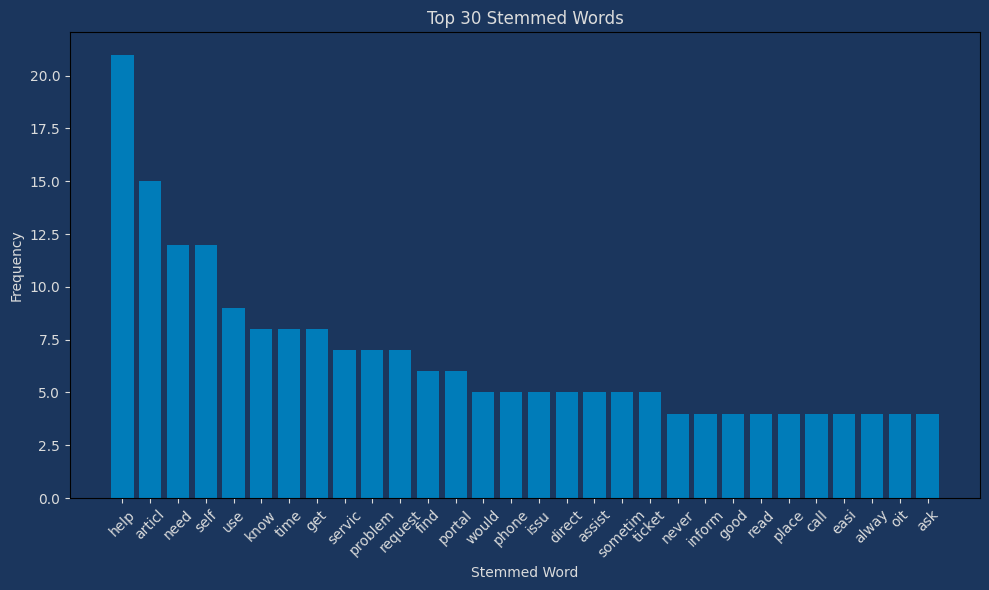

In [ ]:
plot_top_30(yourit_promoter_df)

In [ ]:
stem_freq(yourit_promoter_df)

[('help', 21),
 ('articl', 15),
 ('need', 12),
 ('self', 12),
 ('use', 9),
 ('know', 8),
 ('time', 8),
 ('get', 8),
 ('servic', 7),
 ('problem', 7),
 ('request', 7),
 ('find', 6),
 ('portal', 6),
 ('would', 5),
 ('phone', 5),
 ('issu', 5),
 ('direct', 5),
 ('assist', 5),
 ('sometim', 5),
 ('ticket', 5),
 ('never', 4),
 ('inform', 4),
 ('good', 4),
 ('read', 4),
 ('place', 4),
 ('call', 4),
 ('easi', 4),
 ('alway', 4),
 ('oit', 4),
 ('ask', 4),
 ('question', 4),
 ('work', 4),
 ('like', 4),
 ('applic', 3),
 ('even', 3),
 ('one', 3),
 ('correct', 3),
 ('tri', 3),
 ('chatbot', 3),
 ('seem', 3),
 ('staff', 3),
 ('extent', 3),
 ('team', 3),
 ('custom', 3),
 ('answer', 3),
 ('put', 3),
 ('understand', 3),
 ('none', 2),
 ('addit', 2),
 ('km', 2),
 ('page', 2),
 ('go', 2),
 ('anoth', 2),
 ('list', 2),
 ('support', 2),
 ('much', 2),
 ('someon', 2),
 ('could', 2),
 ('util', 2),
 ('fix', 2),
 ('great', 2),
 ('look', 2),
 ('word', 2),
 ('point', 2),
 ('area', 2),
 ('submit', 2),
 ('often', 2),
 ('c

This batch of comments seems different than the others above in terms of theme.  We will pull the most relevant stems below to see these most common comments, but we will also go through the same steps and themes as the analyses above, just in case.

In [ ]:
stem_list(yourit_promoter_df, 'yourIT Promoter Stems')

List exported to yourit promoter stems.xlsx


In [ ]:
common_yourIT_stems = ['reopen', 'close', 'error', 'wait', 'equip'] # list the most common, actionable stems from stem list

get_matching_stem(yourit_promoter_df, common_yourIT_stems)

,Location,yourIT Comments
313,"MO - St. Louis, John Cochran Veterans Hospital (657)","as a nurse, it is very difficult to read through applications and how to use equipment or even place a call for one. we don't have much time and it would be beneficial if someone could come to the floors once a week to handle problems."
560,"AZ - Prescott, Bob Stump VA Medical Center (649)",sometimes i have difficulty narrowing down the type of assistance i need on it portal. it is user error though not it's fault
799,"VA - Richmond, Hunter Holmes McGuire Hospital (652)","instead of closing tickets and then asking questions only to have to re-enter a ticket, maybe ask questions and give a timeframe for an answer or the ticket will be closed."


In [ ]:
get_matching_stem(yourit_promoter_df, cust_serv2)

,Location,yourIT Comments
218,PR - San Juan VA Medical Center (672),self help videos and list is very good. supports self service
538,"TX - Waco, Doris Miller VA Medical Center (674A4)","my comments are more directed to my local it department, not the portal or support that i have receive from the portal or chatbot, which has been satisfactory"
594,"NC - Salisbury, W.G. (Bill) Hefner VA Medical Center (659)",it would be very helpful to provide the simplest means and the phone/or websites for whatever it based on what service is needed as i have experienced dialing certain extentions and told to dial another phone number/ extention for ever i was calling for a list for each it needs to be made available
608,"PA - Philadelphia, Corporal Michael J. Crescenz VA Medical Center (642)",customer service is usually easy to get a live person to resolve all your issues.
635,Office of Information and Technology (OIT),can't always find an applicable self-help article. good improvements to the yourit service portal.
876,"FL - Miami, Bruce W. Carter VA Medical Center (546)",the it personnel makenzie gave me amazing customer service and completed my requests in a timely manner.
1057,CA - Long Beach VA Medical Center (600),keep self-help stuff as minimal and compact as possible (think bullet points). we don't have time to be reading articles when we're taking care of patients and being pulled in all sorts of other directions.
1286,"OTHER (please specify) El Paso, TX",awesome customer service
1367,KY - Louisville Regional Benefit Office,"at times, i found i did not understand the information given in the self help articles."
1368,"WA - Spokane, Mann-Grandstaff VA Medical Center (668)",alot of the information is hard to understand. i feel like i need to be tech savvy to understand what they want me to try or what the self-help articles are even saying


In [ ]:
get_matching_stem(yourit_promoter_df, time2)

,Location,yourIT Comments


In [ ]:
get_matching_stem(yourit_promoter_df, comm_resp2)

,Location,yourIT Comments
1116,"WA - Vancouver, Portland VA Medical Center (648A4)",visn level and km national do not follow the same rules.


In [ ]:
get_matching_stem(yourit_promoter_df, equip)

,Location,yourIT Comments
195,MO - Northeast District Office,if there is such an importance of addition information for an article in km then it needs to be added to the body of said article . not at the bottom of the page where the pcr has to go to another page for additional information.
594,"NC - Salisbury, W.G. (Bill) Hefner VA Medical Center (659)",it would be very helpful to provide the simplest means and the phone/or websites for whatever it based on what service is needed as i have experienced dialing certain extentions and told to dial another phone number/ extention for ever i was calling for a list for each it needs to be made available
605,"TX - San Antonio, Audie L. Murphy Memorial Veterans' Hospital (671)","call number when i can get on the computer due to being lock or bit locker, assist on the phone, and on, teams in help me get back online to do my job,,"
1086,"CA - Loma Linda, Jerry L. Pettis Memorial Veterans' Hospital (605)",there seems to be a problem getting the ee# equivalents when placing work orders for computers.
1293,"TX - Bonham, Sam Rayburn Memorial Veterans Center (549A4)","it can be challenging to make a problem fit into the categories allowed. a potentially easy improvement would be to allow screen shots to be directly saved to the portal rather than having to create a document, paste, save, and upload."
1315,AZ - Phoenix Regional Benefit Office,"sometimes the forms ask for things, that don't apply and na is not an option where we have to pick something on the drop downs, the drop downs seem confusing"


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, yourit_promoter_df, equip_hard, excel_filename='yourIT Promoter Hardware Comments')

Excel file 'yourIT Promoter Hardware Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, yourit_promoter_df, equip_hard, min_length=10, excel_filename='yourIT Promoter Hardware Comments 10 Or More Words')

Excel file 'yourIT Promoter Hardware Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, yourit_promoter_df, equip_soft, excel_filename='yourIT Promoter Software Comments')

Excel file 'yourIT Promoter Software Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, yourit_promoter_df, equip_soft, min_length=10, excel_filename='yourIT Promoter Software Comments 10 Or More Words')

Excel file 'yourIT Promoter Software Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, yourit_promoter_df, cust_serv2, min_length=10, excel_filename='yourIT Promoter Customer Service Comments 10 Or More Words')

Excel file 'yourIT Promoter Customer Service Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, yourit_promoter_df, time2, min_length=10, excel_filename='yourIT Promoter Timeliness Comments 10 Or More Words')

Excel file 'yourIT Promoter Timeliness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, yourit_promoter_df, comm_resp2, min_length=10, excel_filename='yourIT Promoter Communication Responsiveness Comments 10 Or More Words')

Excel file 'yourIT Promoter Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
percentage(yourit_promoter_df, cust_serv2)

18.51851851851852


This is the percentage of yourIT promoter respondents who mentioned Customer Service.

In [ ]:
percentage(yourit_promoter_df, time2)

0.0


This is the percentage of yourIT promoter respondents who mentioned Timeliness.

In [ ]:
percentage(yourit_promoter_df, comm_resp2)

1.8518518518518516


This is the percentage of yourIT promoter respondents who mentioned Communication/Responsiveness.

In [ ]:
percentage(yourit_promoter_df, equip)

11.11111111111111


This is the percentage of yourIT promoter respondents who mentioned Equipment.

#### **Negative Comment Analysis**

In [ ]:
yourit_detractor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 110 to 1412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yourIT Rating       46 non-null     float64
 1   NPS                 46 non-null     float64
 2   Location            46 non-null     object 
 3   yourIT Comments     46 non-null     object 
 4   comments_tokenized  46 non-null     object 
 5   comments_stemmed    46 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.5+ KB


If this dataframe is small enough, it can probably be assessed manually.  The entire dataframe is printed below, and the thematic analysis processses are below that if needed.

In [ ]:
yourit_detractor_df

,yourIT Rating,NPS,Location,yourIT Comments,comments_tokenized,comments_stemmed
110,5.0,4.0,"KS - Leavenworth, Dwight D. Eisenhower VA Medical Center (589A6)",i have used them rarely.,"[used, rarely]","[use, rare]"
111,3.0,6.0,"GA - Decatur, Atlanta VA Medical Center (508)",i find that they rarely apply to the service being requested.,"[find, rarely, apply, service, requested]","[find, rare, appli, servic, request]"
118,7.0,9.0,,pleased,[pleased],[pleas]
163,2.0,3.0,TN - Memphis VA Medical Center (614),"for issues that require multiple tickets and services from multiple different helpdesks, yourit is not helpful. because, you have to put in multiple tickets and hope and pray that each one lines up so that they are completed by different people in a way that allows the action to be completed. for example, account transfers. one ticket will say ""cannot transfer the account because it is disabled or not in ad"" but you already put in a ticket to enable the account in ad but it went inactive again because it took so long for your people to review the transfer ticket.","[issues, require, multiple, tickets, services, multiple, different, helpdesks, yourit, helpful, put, multiple, tickets, hope, pray, one, lines, completed, different, people, way, allows, action, completed, example, account, transfers, one, ticket, say, cannot, transfer, account, disabled, ad, already, put, ticket, enable, account, ad, went, inactive, took, long, people, review, transfer, ticket]","[issu, requir, multipl, ticket, servic, multipl, differ, helpdesk, yourit, help, put, multipl, ticket, hope, pray, one, line, complet, differ, peopl, way, allow, action, complet, exampl, account, transfer, one, ticket, say, cannot, transfer, account, disabl, ad, alreadi, put, ticket, enabl, account, ad, went, inact, took, long, peopl, review, transfer, ticket]"
164,6.0,9.0,Office of Information and Technology (OIT),"i don't remember ever using knowledge management because most it knowledge management (from other organization) has are outdated or never seems to apply. submit an it ticket should be simple, from the user end, it isn't simple enough, or at least from remote workers' point of view.","[remember, ever, using, knowledge, management, knowledge, management, organization, outdated, never, seems, apply, submit, ticket, simple, user, end, simple, enough, least, remote, workers, point, view]","[rememb, ever, use, knowledg, manag, knowledg, manag, organ, outdat, never, seem, appli, submit, ticket, simpl, user, end, simpl, enough, least, remot, worker, point, view]"
171,1.0,9.0,,way too many pathways for a non it employee to know where to go,"[way, too, many, pathways, non, employee, know, go]","[way, too, mani, pathway, non, employe, know, go]"
202,4.0,1.0,"IL - Chicago, Jesse Brown VA Medical Center (537)",needs improvement.,"[needs, improvement]","[need, improv]"
215,7.0,6.0,"TX - San Antonio, Audie L. Murphy Memorial Veterans' Hospital (671)","i always start with the chatbot. the articles are not usually relevant to what i am looking for, but do provide good information. gaining access to additional software has been pretty easy. updates of requested services or problems are not always accurate and when they are listed as complete, this is not always the case","[always, start, chatbot, articles, usually, relevant, looking, provide, good, information, gaining, access, additional, software, pretty, easy, updates, requested, services, problems, always, accurate, listed, complete, always, case]","[alway, start, chatbot, articl, usual, relev, look, provid, good, inform, gain, access, addit, softwar, pretti, easi, updat, request, servic, problem, alway, accur, list, complet, alway, case]"
238,7.0,7.0,"VA - Richmond, Hunter Holmes McGuire Hospital (652)","i have used yourit for our erdsp requests tor isso review. i am able to do that as i have written down ""how to"". but i find sharepoint, different drives and service portals confusing as i do not know which one i need whe

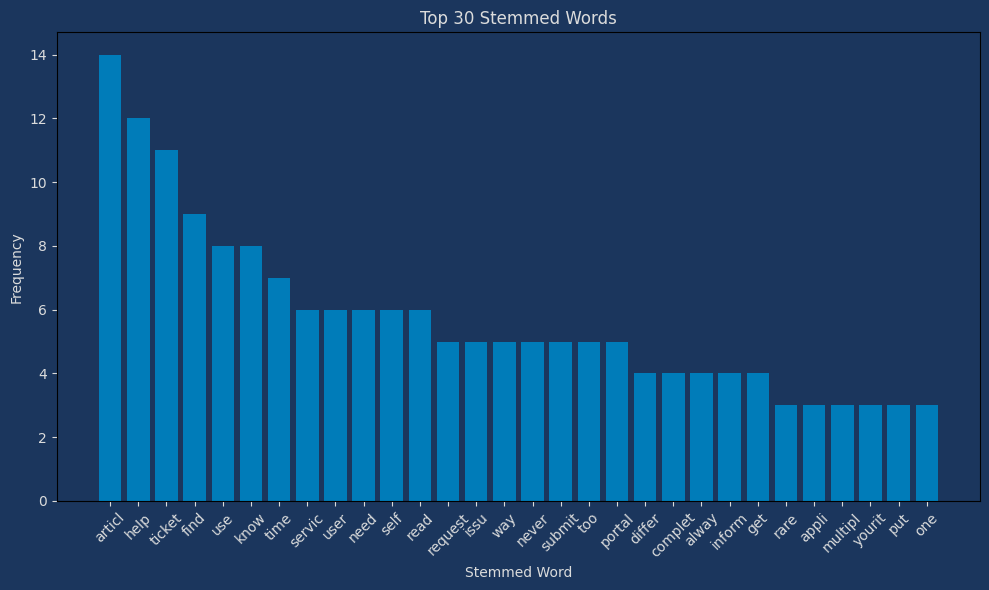

In [ ]:
plot_top_30(yourit_detractor_df)

In [ ]:
stem_freq(yourit_detractor_df)

[('articl', 14),
 ('help', 12),
 ('ticket', 11),
 ('find', 9),
 ('use', 8),
 ('know', 8),
 ('time', 7),
 ('servic', 6),
 ('user', 6),
 ('need', 6),
 ('self', 6),
 ('read', 6),
 ('request', 5),
 ('issu', 5),
 ('way', 5),
 ('never', 5),
 ('submit', 5),
 ('too', 5),
 ('portal', 5),
 ('differ', 4),
 ('complet', 4),
 ('alway', 4),
 ('inform', 4),
 ('get', 4),
 ('rare', 3),
 ('appli', 3),
 ('multipl', 3),
 ('yourit', 3),
 ('put', 3),
 ('one', 3),
 ('peopl', 3),
 ('allow', 3),
 ('account', 3),
 ('transfer', 3),
 ('ad', 3),
 ('seem', 3),
 ('simpl', 3),
 ('mani', 3),
 ('chatbot', 3),
 ('problem', 3),
 ('written', 3),
 ('question', 3),
 ('enter', 3),
 ('understand', 3),
 ('info', 3),
 ('tri', 3),
 ('select', 3),
 ('friendli', 3),
 ('step', 3),
 ('requir', 2),
 ('long', 2),
 ('review', 2),
 ('knowledg', 2),
 ('manag', 2),
 ('outdat', 2),
 ('end', 2),
 ('enough', 2),
 ('least', 2),
 ('point', 2),
 ('non', 2),
 ('go', 2),
 ('usual', 2),
 ('relev', 2),
 ('look', 2),
 ('provid', 2),
 ('easi', 2),
 ('

In [ ]:
stem_list(yourit_detractor_df, 'yourIT Detractor Stems')

List exported to yourit detractor stems.xlsx


In [ ]:
get_matching_stem(yourit_detractor_df, cust_serv2)

,Location,yourIT Comments
215,"TX - San Antonio, Audie L. Murphy Memorial Veterans' Hospital (671)","i always start with the chatbot. the articles are not usually relevant to what i am looking for, but do provide good information. gaining access to additional software has been pretty easy. updates of requested services or problems are not always accurate and when they are listed as complete, this is not always the case"
329,"WA - Walla Walla, Jonathan M. Wainwright Memorial VA Medical Center (687)",we don't understand the terminology used on the website.
737,TX - Waco Regional Benefit Office,"do not have time to read self help articles, too old to understand some of the articles"
960,NY - Brooklyn VA Medical Center (630A4),the entire it portal is. it user friendly… needs more specific choices for help
1106,"MA - Boston, Jamaica Plain VA Medical Center (523)","needs to be easier to find the relevant article and the articles need to be written in a non-technical, user-friendly way."
1327,"NM - Albuquerque, Raymond G. Murphy VA Medical Center (501)",self-help articles aren't written to the end user's level of understanding at all.
1377,MT - Fort Harrison VA Medical Center (436),calling into the it help desk is amazing customer service. isso is the major issue with communication.
1390,NE - Grand Island VA Medical Center (636A4),"the portal is not user friendly, i usually teams a specialist or call the help desk. the portal is frustrating. you have to hit submit at least 3 times before it submits."


In [ ]:
get_matching_stem(yourit_detractor_df, time2)

,Location,yourIT Comments
430,CA - Oakland Regional Benefit Office,don't use the chatbot or self-help articles...i can find the info more quickly and efficiently myself.
582,"MO - Columbia, Harry S. Truman Memorial Veterans' Hospital (589A4)","many people's jobs allow no time to sit on the computer reading articles. we're running - almost literally - all day long. we don't have time to read this stuff, and the few things i personally know to try - about half can't be tried because we are locked out of everything. not sure who broke what 20 years ago, to put such policies in place, but the restrictions seem ridiculous."


##### Converting to Excel Output

In [ ]:
get_excel(get_matching_stem, yourit_detractor_df, equip_hard, excel_filename='yourIT Detractor Hardware Comments')

Excel file 'yourIT Detractor Hardware Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, yourit_detractor_df, equip_hard, min_length=10, excel_filename='yourIT Detractor Hardware Comments 10 Or More Words')

Excel file 'yourIT Detractor Hardware Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel(get_matching_stem, yourit_detractor_df, equip_soft, excel_filename='yourIT Detractor Software Comments')

Excel file 'yourIT Detractor Software Comments.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, yourit_detractor_df, equip_soft, min_length=10, excel_filename='yourIT Detractor Software Comments 10 Or More Words')

Excel file 'yourIT Detractor Software Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, yourit_detractor_df, cust_serv2, min_length=10, excel_filename='yourIT Detractor Customer Service Comments 10 Or More Words')

Excel file 'yourIT Detractor Customer Service Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, yourit_detractor_df, time2, min_length=10, excel_filename='yourIT Detractor Timeliness Comments 10 Or More Words')

Excel file 'yourIT Detractor Timeliness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
get_excel_length(get_matching_stem_length, yourit_detractor_df, comm_resp2, min_length=10, excel_filename='yourIT Detractor Communication Responsiveness Comments 10 Or More Words')

Excel file 'yourIT Detractor Communication Responsiveness Comments 10 Or More Words.xlsx' created successfully.


In [ ]:
percentage(yourit_detractor_df, cust_serv2)

17.391304347826086


This is the percentage of yourIT detractor respondents who mentioned Customer Service.

In [ ]:
percentage(yourit_detractor_df, time2)

4.3478260869565215


This is the percentage of yourIT detractor respondents who mentioned Timeliness.

In [ ]:
percentage(yourit_detractor_df, comm_resp2)

4.3478260869565215


This is the percentage of yourIT detractor respondents who mentioned Communication/Responsiveness.

In [ ]:
percentage(yourit_detractor_df, equip)

13.043478260869565


This is the percentage of yourIT detractor respondents who mentioned Equipment.